## Car  Assignment

- Build a linear model to infer how the price of car varies with independent variables
- steps involved in model
   - 1.Data Exploration
   - 2.Data visualization
   - 3.Data preprocessing
   - 4.Feature selection
   - 5.Model building
   - 6.Residual analysis
   - 7.Model Evaluation

## Data Exploration

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#loading the data
cars=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
cars_df=cars.copy()

In [4]:
#preview the data
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
#exploring thr data
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

- The given data has no missing values

In [6]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
cars_df['CarName']

0                alfa-romero giulia
1               alfa-romero stelvio
2          alfa-romero Quadrifoglio
3                       audi 100 ls
4                        audi 100ls
5                          audi fox
6                        audi 100ls
7                         audi 5000
8                         audi 4000
9               audi 5000s (diesel)
10                         bmw 320i
11                         bmw 320i
12                           bmw x1
13                           bmw x3
14                           bmw z4
15                           bmw x4
16                           bmw x5
17                           bmw x3
18                 chevrolet impala
19            chevrolet monte carlo
20              chevrolet vega 2300
21                    dodge rampage
22              dodge challenger se
23                       dodge d200
24                dodge monaco (sw)
25               dodge colt hardtop
26                  dodge colt (sw)
27             dodge coronet

In [8]:
#function to get only carname from CarName columns(having carname model)
def get_carName(car):
    return car.split()[0]

In [9]:
cars_df['carname']=cars_df['CarName'].apply(get_carName)

In [10]:
#function which corrects the miss spelled car names
def correct_carnames(x):
    if x=='toyouta':
        return 'toyota'
    elif x=='Nissan':
        return 'nissan'
    elif (x=='vw') | (x=='vokswagen'):
        return 'volkswagen'
    elif x=='porcshce':
        return 'porsche'
    else:
        return x

In [11]:
cars_df['carname']=cars_df['carname'].apply(correct_carnames)

In [12]:
cars_df['carname']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181         toyota
182     volkswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189     volkswagen
190     volkswagen
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

## Data Visualization
- visualizing the categorical variables using box and count plots

In [13]:
#Univariant analysis

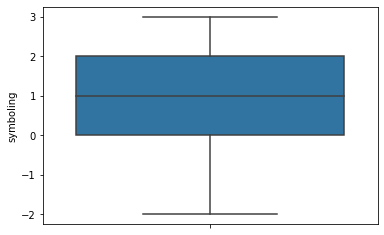

In [14]:
sns.boxplot(cars_df['symboling'],orient='v')

In [15]:
#avearge symboling of all caars is around 1

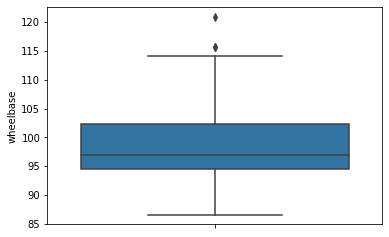

In [16]:
sns.boxplot(cars_df['wheelbase'],orient='v')

In [17]:
#average wheelbase of all cars is around 96

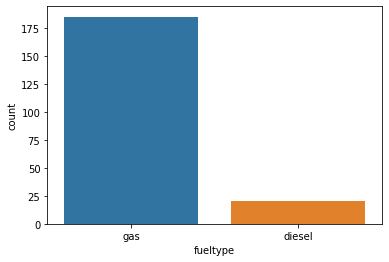

In [18]:
sns.countplot(cars_df['fueltype'])

In [19]:
# most of the cars are gas based compared to diesel

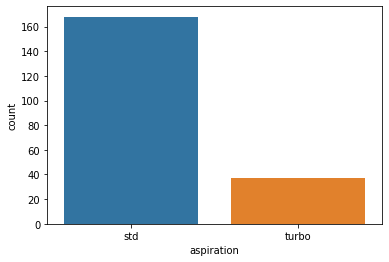

In [20]:
sns.countplot(cars_df['aspiration'])

In [21]:
#most of the cars has std as aspiration

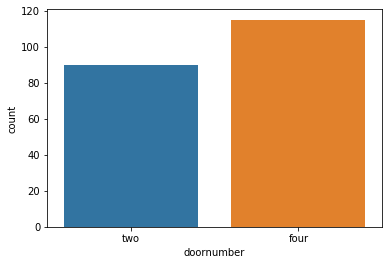

In [22]:
sns.countplot(cars_df['doornumber'])

In [23]:
# most number of cars has 4 doors

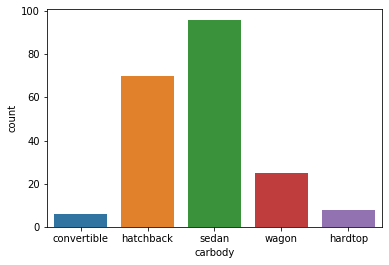

In [24]:
sns.countplot(cars_df['carbody'])

In [25]:
#most of the cars has sedan carbody and least cars have convertible carbody types

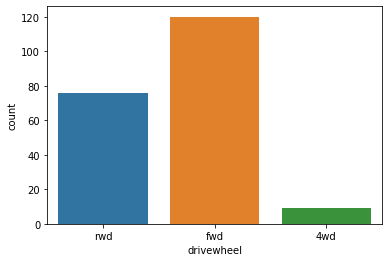

In [26]:
sns.countplot(cars_df['drivewheel'])

In [27]:
#most cars have fwd drivewheel

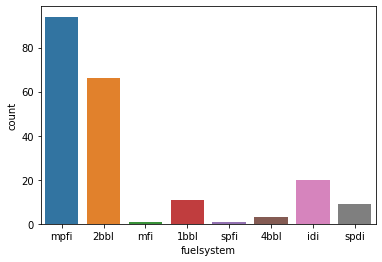

In [28]:
sns.countplot(cars_df['fuelsystem'])

In [29]:
#most cars have mpfi fuelsystem

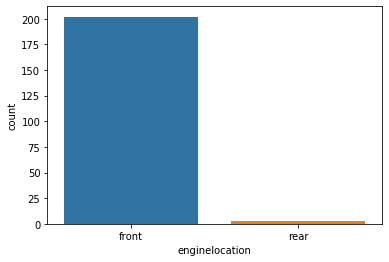

In [30]:
sns.countplot(cars_df['enginelocation'])

In [31]:
#most cars engine is located at front

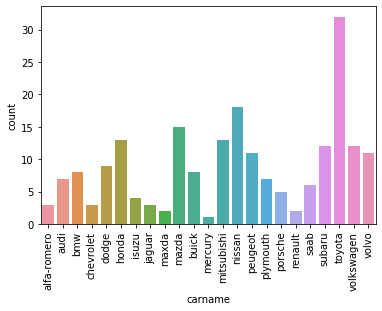

In [32]:
fig=sns.countplot(cars_df['carname'])
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()

In [33]:
#in given data set we have more toyato company cars

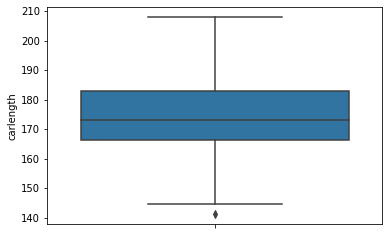

In [34]:
sns.boxplot(cars_df['carlength'],orient='v')

In [35]:
#average carlength of given cars is around 175

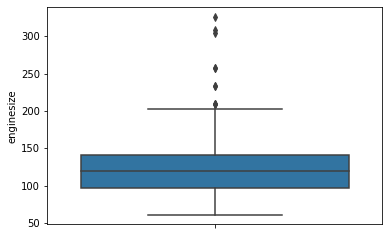

In [36]:
sns.boxplot(cars_df['enginesize'],orient='v')

In [37]:
#average enginesize of given cars is around 125

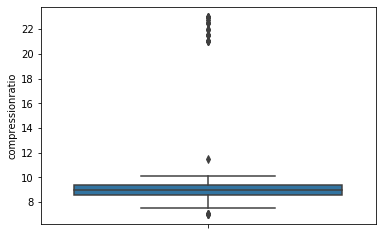

In [38]:
sns.boxplot(cars_df['compressionratio'],orient='v')

In [39]:
#average carlength of given cars is around 9 but there are cars with more than 22 compression ratio

In [40]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Bivariate analysis
- to find the correlation between the target and predictor variables

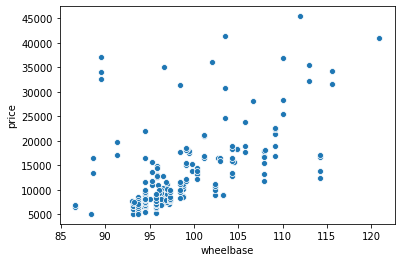

In [41]:
sns.scatterplot('wheelbase','price',data=cars_df)

In [42]:
#Wheelbase is positively correlated with price

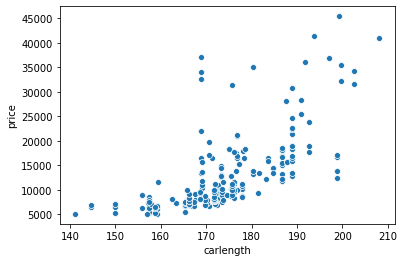

In [43]:
sns.scatterplot('carlength','price',data=cars_df)

In [44]:
#carlength is positively correlated with price

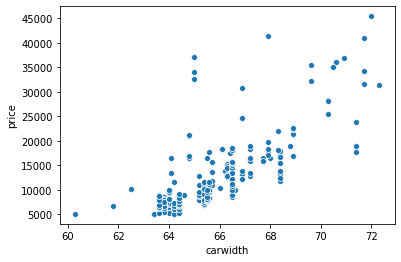

In [45]:
sns.scatterplot('carwidth','price',data=cars_df)

In [46]:
#carwidth is positively correlated with price

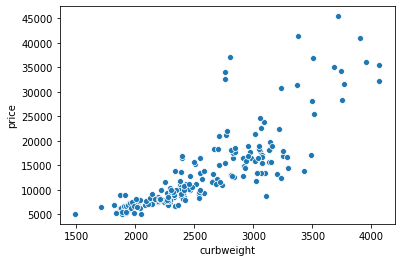

In [47]:
sns.scatterplot('curbweight','price',data=cars_df)

In [48]:
#curbweight is positively correlated with price

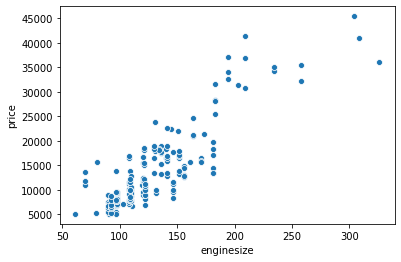

In [49]:
sns.scatterplot('enginesize','price',data=cars_df)

In [50]:
#enginesize is positively correlated with price

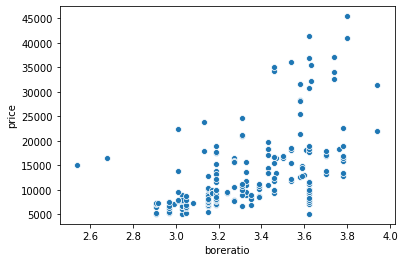

In [51]:
sns.scatterplot('boreratio','price',data=cars_df)

In [52]:
#boreratio is positively correlated with price

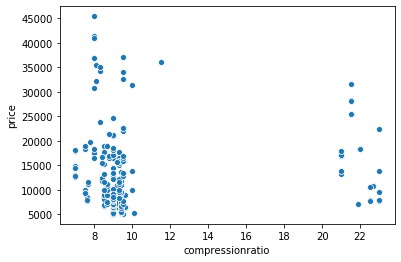

In [53]:
sns.scatterplot('compressionratio','price',data=cars_df)

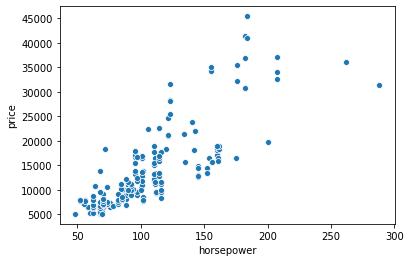

In [54]:
sns.scatterplot('horsepower','price',data=cars_df)

In [55]:
#horsepower is positively correlated with price

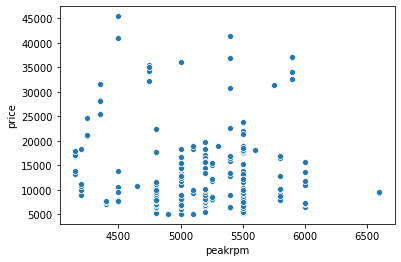

In [56]:
sns.scatterplot('peakrpm','price',data=cars_df)

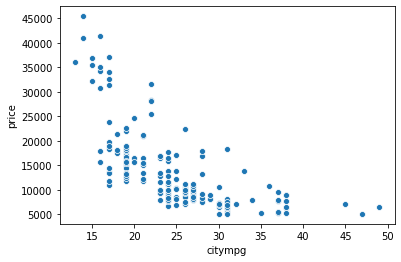

In [57]:
sns.scatterplot('citympg','price',data=cars_df)

In [58]:
#citympg is negatively correlated with price

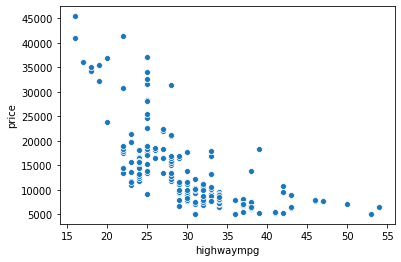

In [59]:
sns.scatterplot('highwaympg','price',data=cars_df)

In [60]:
#highwaympg is negatively correlated with price

In [61]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Encoding

- Encoding categorical variables to numerical variables

In [62]:
#Converting fueltype using binary encoding
cars_df['fueltype']=cars_df['fueltype'].map({'gas':1,'diesel':0})

In [63]:
cars_df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
label=LabelEncoder()

In [66]:
#converting dorrnumber using label encoder as doornumber is a ordinal categorical variable
cars_df['doornumber']=label.fit_transform(cars_df['doornumber'])

In [67]:
cars_df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [68]:
# using one hot encoding to transform categorical carbody variable to numerical
cars_df[['convertible','hardtop','hatchback','sedan']]=pd.get_dummies(cars_df['carbody']).drop('wagon',axis=1)

In [69]:
cars_df.drop('carbody',axis=1,inplace=True)

In [70]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,carname,convertible,hardtop,hatchback,sedan
0,1,3,alfa-romero giulia,1,std,1,rwd,front,88.6,168.8,...,111,5000,21,27,13495.0,alfa-romero,1,0,0,0
1,2,3,alfa-romero stelvio,1,std,1,rwd,front,88.6,168.8,...,111,5000,21,27,16500.0,alfa-romero,1,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,std,1,rwd,front,94.5,171.2,...,154,5000,19,26,16500.0,alfa-romero,0,0,1,0
3,4,2,audi 100 ls,1,std,0,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,audi,0,0,0,1
4,5,2,audi 100ls,1,std,0,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,audi,0,0,0,1


In [71]:
cars_df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [72]:
#converting aspiration using binary encoding
cars_df['aspiration']=cars_df['aspiration'].map({'std':1,'turbo':0})

In [73]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,horsepower,peakrpm,citympg,highwaympg,price,carname,convertible,hardtop,hatchback,sedan
0,1,3,alfa-romero giulia,1,1,1,rwd,front,88.6,168.8,...,111,5000,21,27,13495.0,alfa-romero,1,0,0,0
1,2,3,alfa-romero stelvio,1,1,1,rwd,front,88.6,168.8,...,111,5000,21,27,16500.0,alfa-romero,1,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,1,rwd,front,94.5,171.2,...,154,5000,19,26,16500.0,alfa-romero,0,0,1,0
3,4,2,audi 100 ls,1,1,0,fwd,front,99.8,176.6,...,102,5500,24,30,13950.0,audi,0,0,0,1
4,5,2,audi 100ls,1,1,0,4wd,front,99.4,176.6,...,115,5500,18,22,17450.0,audi,0,0,0,1


In [74]:
cars_df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [75]:
cars_df['drivewheel'].value_counts().index

Index(['fwd', 'rwd', '4wd'], dtype='object')

In [76]:
#converting drivewheel categorical to numerical using one hot encoding
cars_df[['fwd', 'rwd']]=pd.get_dummies(cars_df['drivewheel']).drop('4wd',axis=1)

In [77]:
cars_df.drop('drivewheel',axis=1,inplace=True)

In [78]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,citympg,highwaympg,price,carname,convertible,hardtop,hatchback,sedan,fwd,rwd
0,1,3,alfa-romero giulia,1,1,1,front,88.6,168.8,64.1,...,21,27,13495.0,alfa-romero,1,0,0,0,0,1
1,2,3,alfa-romero stelvio,1,1,1,front,88.6,168.8,64.1,...,21,27,16500.0,alfa-romero,1,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,1,1,1,front,94.5,171.2,65.5,...,19,26,16500.0,alfa-romero,0,0,1,0,0,1
3,4,2,audi 100 ls,1,1,0,front,99.8,176.6,66.2,...,24,30,13950.0,audi,0,0,0,1,1,0
4,5,2,audi 100ls,1,1,0,front,99.4,176.6,66.4,...,18,22,17450.0,audi,0,0,0,1,0,0


In [79]:
cars_df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [80]:
#converting enginelocation categorical to numerical using binary encoding
cars_df['enginelocation']=cars_df['enginelocation'].map({'front':1,'rear':0})

In [81]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,citympg,highwaympg,price,carname,convertible,hardtop,hatchback,sedan,fwd,rwd
0,1,3,alfa-romero giulia,1,1,1,1,88.6,168.8,64.1,...,21,27,13495.0,alfa-romero,1,0,0,0,0,1
1,2,3,alfa-romero stelvio,1,1,1,1,88.6,168.8,64.1,...,21,27,16500.0,alfa-romero,1,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,1,1,1,1,94.5,171.2,65.5,...,19,26,16500.0,alfa-romero,0,0,1,0,0,1
3,4,2,audi 100 ls,1,1,0,1,99.8,176.6,66.2,...,24,30,13950.0,audi,0,0,0,1,1,0
4,5,2,audi 100ls,1,1,0,1,99.4,176.6,66.4,...,18,22,17450.0,audi,0,0,0,1,0,0


In [82]:
cars_df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [83]:
#converting categotical enginetype to numerical using one hot encoding
cars_df[['ohc','ohcf','ohcv','dohc','l','rotor']]=pd.get_dummies(cars_df['enginetype']).drop('dohcv',axis=1)

In [84]:
cars_df.drop('enginetype',axis=1,inplace=True)

In [85]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,hatchback,sedan,fwd,rwd,ohc,ohcf,ohcv,dohc,l,rotor
0,1,3,alfa-romero giulia,1,1,1,1,88.6,168.8,64.1,...,0,0,0,1,1,0,0,0,0,0
1,2,3,alfa-romero stelvio,1,1,1,1,88.6,168.8,64.1,...,0,0,0,1,1,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,1,1,94.5,171.2,65.5,...,1,0,0,1,0,0,0,0,1,0
3,4,2,audi 100 ls,1,1,0,1,99.8,176.6,66.2,...,0,1,1,0,0,0,1,0,0,0
4,5,2,audi 100ls,1,1,0,1,99.4,176.6,66.4,...,0,1,0,0,0,0,1,0,0,0


In [86]:
cars_df['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [87]:
#converting cylindernumber using custom map as its value is of integer type
cars_df['cylindernumber']=cars_df['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12})

In [88]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,hatchback,sedan,fwd,rwd,ohc,ohcf,ohcv,dohc,l,rotor
0,1,3,alfa-romero giulia,1,1,1,1,88.6,168.8,64.1,...,0,0,0,1,1,0,0,0,0,0
1,2,3,alfa-romero stelvio,1,1,1,1,88.6,168.8,64.1,...,0,0,0,1,1,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,1,1,94.5,171.2,65.5,...,1,0,0,1,0,0,0,0,1,0
3,4,2,audi 100 ls,1,1,0,1,99.8,176.6,66.2,...,0,1,1,0,0,0,1,0,0,0
4,5,2,audi 100ls,1,1,0,1,99.4,176.6,66.4,...,0,1,0,0,0,0,1,0,0,0


In [89]:
cars_df['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [90]:
#converting categotical fuelsystem to numerical using one hot encoding
cars_df[['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi']]=pd.get_dummies(cars_df['fuelsystem']).drop('spfi',axis=1)

In [91]:
cars_df.drop('fuelsystem',axis=1,inplace=True)

In [92]:
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,dohc,l,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
0,1,3,alfa-romero giulia,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,1,0
1,2,3,alfa-romero stelvio,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,1,0
2,3,1,alfa-romero Quadrifoglio,1,1,1,1,94.5,171.2,65.5,...,0,1,0,0,0,0,0,0,1,0
3,4,2,audi 100 ls,1,1,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,5,2,audi 100ls,1,1,0,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


In [93]:
cars_df['carname'].value_counts()

toyota         32
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
maxda           2
mercury         1
Name: carname, dtype: int64

In [94]:
#coping data to a different dataframe without converting carname to numerical for farther analysis
cars_df_withoutdummies_car=cars_df.copy()

In [95]:
#removing the carname in copied dataframe
cars_df_withoutdummies_car.drop('CarName',axis=1,inplace=True)

In [96]:
cars_df['carname'].value_counts()

toyota         32
nissan         18
mazda          15
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
maxda           2
mercury         1
Name: carname, dtype: int64

In [97]:
# converting the categorical carname to numerical using one hot encoding
cars_df[['alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda','isuzu', 'jaguar', 'maxda',\
         'mazda', 'mitsubishi', 'nissan','peugeot', 'plymouth', 'porsche',\
         'renault', 'saab', 'subaru', 'toyota','volkswagen', 'volvo']]=pd.get_dummies(cars_df['carname']).drop('mercury',axis=1)

In [98]:
cars_df.drop('CarName',axis=1,inplace=True)

In [99]:
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,1,1,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,4,2,1,1,0,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,5,2,1,1,0,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [100]:
#number of columns in cars dataframe 
len(cars_df.columns)

63

In [101]:
#number of columns in dataframe without carname categorical variable
len(cars_df_withoutdummies_car.columns)

41

## Data Preprocessing
- Before feeding data to the model preprocessing data by scaling to reduce the iteration to converge

In [102]:
#performing splitting before scaling 
from sklearn.model_selection import train_test_split

In [103]:
#train and test data with carname added
train_df,test_df=train_test_split(cars_df,test_size=0.3,random_state=1)

In [104]:
#train and test data without carname
train_withoutcar_df,test_withoutcar_df=train_test_split(cars_df_withoutdummies_car,test_size=0.3,random_state=1)

In [105]:
#previewing the train data
train_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
124,125,3,1,0,1,1,95.9,173.2,66.3,50.2,...,0,0,1,0,0,0,0,0,0,0
181,182,-1,1,1,0,1,104.5,187.8,66.5,54.1,...,0,0,0,0,0,0,0,1,0,0
154,155,0,1,1,0,1,95.7,169.7,63.6,59.1,...,0,0,0,0,0,0,0,1,0,0
53,54,1,1,1,0,1,93.1,166.8,64.2,54.1,...,0,0,0,0,0,0,0,0,0,0
94,95,1,1,1,1,1,94.5,165.3,63.8,54.5,...,1,0,0,0,0,0,0,0,0,0


In [106]:
#previewing the train data without carname 
train_withoutcar_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,dohc,l,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
124,125,3,1,0,1,1,95.9,173.2,66.3,50.2,...,0,0,0,0,0,0,0,0,0,1
181,182,-1,1,1,0,1,104.5,187.8,66.5,54.1,...,0,0,0,0,0,0,0,0,1,0
154,155,0,1,1,0,1,95.7,169.7,63.6,59.1,...,0,0,0,0,1,0,0,0,0,0
53,54,1,1,1,0,1,93.1,166.8,64.2,54.1,...,0,0,0,0,1,0,0,0,0,0
94,95,1,1,1,1,1,94.5,165.3,63.8,54.5,...,0,0,0,0,1,0,0,0,0,0


In [107]:
#importing the minmaxscaler to scale the data
#as minmax scaler removes the outlier not need to treat them separately
from sklearn.preprocessing import MinMaxScaler

In [108]:
#creating a scaler obbject to scale the data
scaler=MinMaxScaler()

In [109]:
#removing car_ID,carname,price from predictor varaibles

In [110]:
numvars=['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'hardtop', 'hatchback', 'sedan',
       'fwd', 'rwd', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'alfa-romero', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'maxda', 'mazda', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo']

In [111]:
train_withoutcar_df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'carname', 'convertible', 'hardtop', 'hatchback', 'sedan',
       'fwd', 'rwd', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi'],
      dtype='object')

In [112]:
#predictor variable of dataframe without carname encoded
#car_ID,carname,price are not included

In [113]:
numvar_withoutcar=['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'hardtop', 'hatchback', 'sedan',
       'fwd', 'rwd', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi']

In [114]:
#fitting and tranforming the trained data using minmax scaler object
train_df[numvars]=scaler.fit_transform(train_df[numvars])

In [115]:
#test data should be fitted to scaler object so just transforming the test data using scaler object of trained data
test_df[numvars]=scaler.transform(test_df[numvars])

In [116]:
#same procedure is followed for train and test data without carname
scaler_withoutcar=MinMaxScaler()

In [117]:
train_withoutcar_df[numvar_withoutcar]=scaler_withoutcar.fit_transform(train_withoutcar_df[numvar_withoutcar])

In [118]:
test_withoutcar_df[numvar_withoutcar]=scaler_withoutcar.transform(test_withoutcar_df[numvar_withoutcar])

In [119]:
#previewing the training data after scaling
train_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
124,125,1.0,1.0,0.0,1.0,1.0,0.320690,0.493103,0.428571,0.200000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181,182,0.2,1.0,1.0,0.0,1.0,0.617241,0.744828,0.447619,0.525000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
154,155,0.4,1.0,1.0,0.0,1.0,0.313793,0.432759,0.171429,0.941667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53,54,0.6,1.0,1.0,0.0,1.0,0.224138,0.382759,0.228571,0.525000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,95,0.6,1.0,1.0,1.0,1.0,0.272414,0.356897,0.190476,0.558333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
#preview the training data without car name after scaling
train_withoutcar_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,dohc,l,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi
124,125,1.0,1.0,0.0,1.0,1.0,0.320690,0.493103,0.428571,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
181,182,0.2,1.0,1.0,0.0,1.0,0.617241,0.744828,0.447619,0.525000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
154,155,0.4,1.0,1.0,0.0,1.0,0.313793,0.432759,0.171429,0.941667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53,54,0.6,1.0,1.0,0.0,1.0,0.224138,0.382759,0.228571,0.525000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
94,95,0.6,1.0,1.0,1.0,1.0,0.272414,0.356897,0.190476,0.558333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [121]:
#segregating predictor and target variables of training data
X_train_scaled=train_df[numvars]
y_train=train_df['price']

In [122]:
#predictor variables
X_train_scaled.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'hardtop', 'hatchback', 'sedan', 'fwd', 'rwd', 'ohc',
       'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'alfa-romero', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [123]:
#segregating predictor and target variables of training data without carname
X_train_withoutcar_scaled=train_withoutcar_df[numvar_withoutcar]
y_train_withoutcar=train_withoutcar_df['price']

In [124]:
#predictor variables
X_train_withoutcar_scaled.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'convertible', 'hardtop', 'hatchback', 'sedan', 'fwd', 'rwd', 'ohc',
       'ohcf', 'ohcv', 'dohc', 'l', 'rotor', '1bbl', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi'],
      dtype='object')

In [125]:
#segregating predictor and target variables of test data
X_test_scaled=test_df[numvars]
y_test=test_df['price']

In [126]:
#segregating predictor and target variables of test data without carname
X_test_withoutcar_scaled=test_withoutcar_df[numvar_withoutcar]
y_test_withoutcar=test_withoutcar_df['price']

## Model building

In [127]:
#importing statsmodel and linearregression used for model building
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [128]:
#importing rfe for feature selection
from sklearn.feature_selection import RFE

## Feature Selection using RFE

- Since the give data has more than 60 columns so trying to use balancing technique
- First find the important features using RFE
- then perform manual approach to balance tune the variable

In [129]:
#To determine the optimum number of features from rfe created the iterative logic which return number of features at which accuarcy of model is high
score=0
list_of_features=np.arange(2,63)  
num_features=0
for i in list_of_features:#loops from 2 to 62
    lr=LinearRegression().fit(X_train_scaled,y_train)
    rfe=RFE(lr,i)
    train_rfe=rfe.fit(X_train_scaled,y_train)
    features_df=pd.DataFrame(list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_)),columns=['Feature','Support','Rank'])
    features=features_df[features_df['Support']==True]['Feature'].values
    model=lr.fit(X_train_scaled[features],y_train)
    X_test=X_test_scaled[features]
    modelscore=model.score(X_test,y_test)
    if (modelscore>score):# logic to find highest model score (r2) value
        score=modelscore
        num_features=i
        model=model
        final_features=features
print("optimum features",num_features)
print("Score",score)
print("Features:",final_features)


optimum features 37
Score 0.9079064920056402
Features: ['fueltype' 'aspiration' 'enginelocation' 'wheelbase' 'carlength'
 'carwidth' 'curbweight' 'cylindernumber' 'enginesize' 'boreratio'
 'stroke' 'compressionratio' 'peakrpm' 'citympg' 'convertible' 'ohc'
 'ohcf' 'ohcv' 'dohc' 'l' '1bbl' '2bbl' 'idi' 'mpfi' 'spdi' 'alfa-romero'
 'audi' 'bmw' 'buick' 'honda' 'jaguar' 'mazda' 'peugeot' 'porsche' 'saab'
 'subaru' 'volvo']


In [130]:
# Logic to determine the optimum features from training data without carname
score=0
list_of_features=np.arange(2,41)
num_features_withoutcar=0
for i in list_of_features:
    lr_withoutcar=LinearRegression().fit(X_train_withoutcar_scaled,y_train_withoutcar)
    rfe_withoutcar=RFE(lr_withoutcar,i)
    train_rfe_withoutcar=rfe_withoutcar.fit(X_train_withoutcar_scaled,y_train_withoutcar)
    features_withoutcar_df=pd.DataFrame(list(zip(X_train_withoutcar_scaled.columns,rfe_withoutcar.support_,rfe_withoutcar.ranking_)),columns=['Feature','Support','Rank'])
    features=features_withoutcar_df[features_withoutcar_df['Support']==True]['Feature'].values
    model=lr_withoutcar.fit(X_train_withoutcar_scaled[features],y_train_withoutcar)
    X_test_withoutcar=X_test_withoutcar_scaled[features]
    modelscore=model.score(X_test_withoutcar,y_test_withoutcar)
    if (modelscore>score):
        score=modelscore
        num_features_withoutcar=i
        model=model
        final_features_withoutcar=features
print("optimum features withoutcarname",num_features_withoutcar)
print("Score",score)
print("Features:",final_features_withoutcar)


optimum features withoutcarname 29
Score 0.8535921110135383
Features: ['symboling' 'fueltype' 'aspiration' 'enginelocation' 'wheelbase'
 'carlength' 'carwidth' 'carheight' 'curbweight' 'enginesize' 'boreratio'
 'stroke' 'compressionratio' 'horsepower' 'peakrpm' 'citympg' 'highwaympg'
 'convertible' 'sedan' 'rwd' 'ohc' 'ohcf' 'ohcv' 'dohc' 'l' 'rotor' '4bbl'
 'idi' 'spdi']


In [131]:
##RFE model has suggested 37 features for the model with carname and 29 features for the model without carname

In [132]:
#features selected by rfe for model with carname
final_features

array(['fueltype', 'aspiration', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'citympg', 'convertible', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l',
       '1bbl', '2bbl', 'idi', 'mpfi', 'spdi', 'alfa-romero', 'audi',
       'bmw', 'buick', 'honda', 'jaguar', 'mazda', 'peugeot', 'porsche',
       'saab', 'subaru', 'volvo'], dtype=object)

In [133]:
#features selected by rfe for model without carname
final_features_withoutcar

array(['symboling', 'fueltype', 'aspiration', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'convertible',
       'sedan', 'rwd', 'ohc', 'ohcf', 'ohcv', 'dohc', 'l', 'rotor',
       '4bbl', 'idi', 'spdi'], dtype=object)

## Model with carname feature

In [134]:
#taking all the features selected by rfe
X_train_sm=X_train_scaled[final_features]

In [135]:
# as statsmodel won't create constant on its own adding a constant explicitly
import statsmodels.api as sm
X_train_scaled_sm=sm.add_constant(X_train_sm)

In [136]:
#fitting the model using Ordinary least square estimate
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [137]:
#previewing the summary of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     92.00
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.68e-65
Time:                        22:11:40   Log-Likelihood:                -1245.7
No. Observations:                 143   AIC:                             2561.
Df Residuals:                     108   BIC:                             2665.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.132e+04   2531.488      4.473      0.000    6306.630    1.63e+04
fueltype          2028.2819   2161.926      0.938      0.350   -2257.030    6313.594
aspiration       -1674.8887    674.416     -2.483      0.015   -3011.698    -338.080
enginelocation   -2439.7202   1537.871     -1.586      0.116   -5488.048     608.608
wheelbase         7111.0504   2356.136      3.018      0.003    2440.781    1.18e+04
carlength        -5061.1375   2800.144     -1.807      0.073   -1.06e+04     489.234
carwidth          7241.6278   2305.344      3.141      0.002    2672.036    1.18e+04
curbweight        5865.1133   2842.449      2.063      0.041     230.887    1.15e+04
cylindernumber   -4922.0316   4848.110     -1.015      0.312   -1.45e+04    4687.763
enginesize        2.469e+04   5111.924      4.831      0.000    1.46e+04    3.48e+04
boreratio        -4072.2791   1803.039     -2.259      0.026   -7646.214    -498.344
stroke           -3506.7120   1731.115     -2.026      0.045   -6938.082     -75.342
compressionratio -1.119e+04   7011.989     -1.596      0.113   -2.51e+04    2704.620
peakrpm           3148.3234   1431.422      2.199      0.030     310.997    5985.649
citympg           2838.9252   2510.051      1.131      0.261   -2136.431    7814.282
convertible       3003.2724   1106.922      2.713      0.008     809.161    5197.384
ohc              -1662.0135   1897.343     -0.876      0.383   -5422.877    2098.850
ohcf             -1885.7148   1066.707     -1.768      0.080   -4000.113     228.683
ohcv             -2363.7953   1741.661     -1.357      0.178   -5816.070    1088.479
dohc              5988.2384   1309.299      4.574      0.000    3392.981    8583.496
l                -2224.7905   1984.148     -1.121      0.265   -6157.716    1708.135
1bbl             -5365.5221   2353.510     -2.280      0.025      -1e+04    -700.456
2bbl             -2232.5001   1673.639     -1.334      0.185   -5549.942    1084.942
idi               9296.1976   4078.202      2.279      0.025    1212.494    1.74e+04
mpfi             -1833.9212   1647.606     -1.113      0.268   -5099.762    1431.920
spdi             -3664.8569   1892.149     -1.937      0.055   -7415.425      85.711
alfa-romero       2876.1217   1402.903      2.050      0.043      95.324    5656.920
audi              2655.0962   1010.972      2.626      0.010     651.174    4659.018
bmw               9345.8686   1068.153      8.750      0.000    7228.605    1.15e+04
buick             8003.6121   1307.943      6.119      0.000    5411.042    1.06e+04
honda             2529.8078   1287.954      1.964      0.052     -23.140    5082.756
jaguar            6547.5356   1907.462      3.433      0.001    2766.615    1.03e+04
mazda             1849.8922    678.429      2.727      0.007     505.128    3194.656
peugeot          -1885.

In [138]:
#importing vif from stats model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
#created a method which return VIF of all the features in the given dataframe
def VIF(X_train):
    vif=pd.DataFrame()
    vif['Features']=X_train.columns
    vif['VIF']=[variance_inflation_factor(X_train.values,i).round(2) for i in range(X_train.shape[1])]
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [140]:
VIF(X_train_scaled_sm)

,Features,VIF
19,dohc,inf
1,fueltype,inf
33,peugeot,inf
3,enginelocation,inf
17,ohcf,inf
36,subaru,inf
23,idi,inf
12,compressionratio,143.52
24,mpfi,33.91
9,enginesize,33.79


In [141]:
#dropping fueltype as it has high P value and high VIF

In [142]:
X_train_sm.drop('fueltype',axis=1,inplace=True)

In [143]:
import statsmodels.api as sm
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [144]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     92.00
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.68e-65
Time:                        22:11:40   Log-Likelihood:                -1245.7
No. Observations:                 143   AIC:                             2561.
Df Residuals:                     108   BIC:                             2665.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.285e+04   2208.050      5.818      0.000    8468.953    1.72e+04
aspiration       -1674.8887    674.416     -2.483      0.015   -3011.698    -338.080
enginelocation   -1932.6497   1402.525     -1.378      0.171   -4712.697     847.397
wheelbase         7111.0504   2356.136      3.018      0.003    2440.781    1.18e+04
carlength        -5061.1375   2800.144     -1.807      0.073   -1.06e+04     489.234
carwidth          7241.6278   2305.344      3.141      0.002    2672.036    1.18e+04
curbweight        5865.1133   2842.449      2.063      0.041     230.887    1.15e+04
cylindernumber   -4922.0316   4848.110     -1.015      0.312   -1.45e+04    4687.763
enginesize        2.469e+04   5111.924      4.831      0.000    1.46e+04    3.48e+04
boreratio        -4072.2791   1803.039     -2.259      0.026   -7646.214    -498.344
stroke           -3506.7120   1731.115     -2.026      0.045   -6938.082     -75.342
compressionratio -1.119e+04   7011.989     -1.596      0.113   -2.51e+04    2704.620
peakrpm           3148.3234   1431.422      2.199      0.030     310.997    5985.649
citympg           2838.9252   2510.051      1.131      0.261   -2136.431    7814.282
convertible       3003.2724   1106.922      2.713      0.008     809.161    5197.384
ohc              -1662.0135   1897.343     -0.876      0.383   -5422.877    2098.850
ohcf             -1885.7148   1066.707     -1.768      0.080   -4000.113     228.683
ohcv             -2363.7953   1741.661     -1.357      0.178   -5816.070    1088.479
dohc              6495.3089   1336.458      4.860      0.000    3846.217    9144.401
l                -2224.7905   1984.148     -1.121      0.265   -6157.716    1708.135
1bbl             -5365.5221   2353.510     -2.280      0.025      -1e+04    -700.456
2bbl             -2232.5001   1673.639     -1.334      0.185   -5549.942    1084.942
idi               7267.9157   6016.882      1.208      0.230   -4658.589    1.92e+04
mpfi             -1833.9212   1647.606     -1.113      0.268   -5099.762    1431.920
spdi             -3664.8569   1892.149     -1.937      0.055   -7415.425      85.711
alfa-romero       2876.1217   1402.903      2.050      0.043      95.324    5656.920
audi              2655.0962   1010.972      2.626      0.010     651.174    4659.018
bmw               9345.8686   1068.153      8.750      0.000    7228.605    1.15e+04
buick             8003.6121   1307.943      6.119      0.000    5411.042    1.06e+04
honda             2529.8078   1287.954      1.964      0.052     -23.140    5082.756
jaguar            6547.5356   1907.462      3.433      0.001    2766.615    1.03e+04
mazda             1849.8922    678.429      2.727      0.007     505.128    3194.656
peugeot          -1885.7148   1066.707     -1.768      0.080   -4000.113     228.683
porsche           8329.

In [145]:
VIF(X_train_scaled_sm)

,Features,VIF
18,dohc,inf
16,ohcf,inf
32,peugeot,inf
35,subaru,inf
2,enginelocation,inf
22,idi,149.86
11,compressionratio,143.52
23,mpfi,33.91
8,enginesize,33.79
17,ohcv,31.52


In [146]:
#dropping enginelocation as it has high P value and high VIF

In [147]:
X_train_sm.drop('enginelocation',axis=1,inplace=True)

In [148]:
import statsmodels.api as sm
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [149]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     92.00
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.68e-65
Time:                        22:11:41   Log-Likelihood:                -1245.7
No. Observations:                 143   AIC:                             2561.
Df Residuals:                     108   BIC:                             2665.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.091e+04   2758.318      3.956      0.000    5445.577    1.64e+04
aspiration       -1674.8887    674.416     -2.483      0.015   -3011.698    -338.080
wheelbase         7111.0504   2356.136      3.018      0.003    2440.781    1.18e+04
carlength        -5061.1375   2800.144     -1.807      0.073   -1.06e+04     489.234
carwidth          7241.6278   2305.344      3.141      0.002    2672.036    1.18e+04
curbweight        5865.1133   2842.449      2.063      0.041     230.887    1.15e+04
cylindernumber   -4922.0316   4848.110     -1.015      0.312   -1.45e+04    4687.763
enginesize        2.469e+04   5111.924      4.831      0.000    1.46e+04    3.48e+04
boreratio        -4072.2791   1803.039     -2.259      0.026   -7646.214    -498.344
stroke           -3506.7120   1731.115     -2.026      0.045   -6938.082     -75.342
compressionratio -1.119e+04   7011.989     -1.596      0.113   -2.51e+04    2704.620
peakrpm           3148.3234   1431.422      2.199      0.030     310.997    5985.649
citympg           2838.9252   2510.051      1.131      0.261   -2136.431    7814.282
convertible       3003.2724   1106.922      2.713      0.008     809.161    5197.384
ohc              -1662.0135   1897.343     -0.876      0.383   -5422.877    2098.850
ohcf             -1885.7148   1066.707     -1.768      0.080   -4000.113     228.683
ohcv             -2363.7953   1741.661     -1.357      0.178   -5816.070    1088.479
dohc              8427.9586   2388.858      3.528      0.001    3692.827    1.32e+04
l                -2224.7905   1984.148     -1.121      0.265   -6157.716    1708.135
1bbl             -5365.5221   2353.510     -2.280      0.025      -1e+04    -700.456
2bbl             -2232.5001   1673.639     -1.334      0.185   -5549.942    1084.942
idi               7267.9157   6016.882      1.208      0.230   -4658.589    1.92e+04
mpfi             -1833.9212   1647.606     -1.113      0.268   -5099.762    1431.920
spdi             -3664.8569   1892.149     -1.937      0.055   -7415.425      85.711
alfa-romero       2876.1217   1402.903      2.050      0.043      95.324    5656.920
audi              2655.0962   1010.972      2.626      0.010     651.174    4659.018
bmw               9345.8686   1068.153      8.750      0.000    7228.605    1.15e+04
buick             8003.6121   1307.943      6.119      0.000    5411.042    1.06e+04
honda             2529.8078   1287.954      1.964      0.052     -23.140    5082.756
jaguar            6547.5356   1907.462      3.433      0.001    2766.615    1.03e+04
mazda             1849.8922    678.429      2.727      0.007     505.128    3194.656
peugeot          -1885.7148   1066.707     -1.768      0.080   -4000.113     228.683
porsche           8329.6141   1950.812      4.270      0.000    4462.766    1.22e+04
saab              3157.

In [150]:
VIF(X_train_scaled_sm)

,Features,VIF
15,ohcf,inf
31,peugeot,inf
0,const,381.09
21,idi,149.86
10,compressionratio,143.52
22,mpfi,33.91
7,enginesize,33.79
16,ohcv,31.52
20,2bbl,31.29
17,dohc,21.97


In [151]:
#dropping ohcf as it has high P value and high VIF

In [152]:
X_train_sm.drop('ohcf',axis=1,inplace=True)

In [153]:
import statsmodels.api as sm
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [154]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     92.00
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.68e-65
Time:                        22:11:41   Log-Likelihood:                -1245.7
No. Observations:                 143   AIC:                             2561.
Df Residuals:                     108   BIC:                             2665.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.091e+04   2758.318      3.956      0.000    5445.577    1.64e+04
aspiration       -1674.8887    674.416     -2.483      0.015   -3011.698    -338.080
wheelbase         7111.0504   2356.136      3.018      0.003    2440.781    1.18e+04
carlength        -5061.1375   2800.144     -1.807      0.073   -1.06e+04     489.234
carwidth          7241.6278   2305.344      3.141      0.002    2672.036    1.18e+04
curbweight        5865.1133   2842.449      2.063      0.041     230.887    1.15e+04
cylindernumber   -4922.0316   4848.110     -1.015      0.312   -1.45e+04    4687.763
enginesize        2.469e+04   5111.924      4.831      0.000    1.46e+04    3.48e+04
boreratio        -4072.2791   1803.039     -2.259      0.026   -7646.214    -498.344
stroke           -3506.7120   1731.115     -2.026      0.045   -6938.082     -75.342
compressionratio -1.119e+04   7011.989     -1.596      0.113   -2.51e+04    2704.620
peakrpm           3148.3234   1431.422      2.199      0.030     310.997    5985.649
citympg           2838.9252   2510.051      1.131      0.261   -2136.431    7814.282
convertible       3003.2724   1106.922      2.713      0.008     809.161    5197.384
ohc              -1662.0135   1897.343     -0.876      0.383   -5422.877    2098.850
ohcv             -2363.7953   1741.661     -1.357      0.178   -5816.070    1088.479
dohc              8427.9586   2388.858      3.528      0.001    3692.827    1.32e+04
l                -2224.7905   1984.148     -1.121      0.265   -6157.716    1708.135
1bbl             -5365.5221   2353.510     -2.280      0.025      -1e+04    -700.456
2bbl             -2232.5001   1673.639     -1.334      0.185   -5549.942    1084.942
idi               7267.9157   6016.882      1.208      0.230   -4658.589    1.92e+04
mpfi             -1833.9212   1647.606     -1.113      0.268   -5099.762    1431.920
spdi             -3664.8569   1892.149     -1.937      0.055   -7415.425      85.711
alfa-romero       2876.1217   1402.903      2.050      0.043      95.324    5656.920
audi              2655.0962   1010.972      2.626      0.010     651.174    4659.018
bmw               9345.8686   1068.153      8.750      0.000    7228.605    1.15e+04
buick             8003.6121   1307.943      6.119      0.000    5411.042    1.06e+04
honda             2529.8078   1287.954      1.964      0.052     -23.140    5082.756
jaguar            6547.5356   1907.462      3.433      0.001    2766.615    1.03e+04
mazda             1849.8922    678.429      2.727      0.007     505.128    3194.656
peugeot          -3771.4297   2133.414     -1.768      0.080   -8000.226     457.367
porsche           8329.6141   1950.812      4.270      0.000    4462.766    1.22e+04
saab              3157.3636   1040.180      3.035      0.003    1095.546    5219.181
subaru           -1.022

In [155]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,381.09
20,idi,149.86
10,compressionratio,143.52
21,mpfi,33.91
7,enginesize,33.79
15,ohcv,31.52
19,2bbl,31.29
16,dohc,21.97
33,subaru,19.27
5,curbweight,18.80


In [156]:
#dropping idi as it has high P value and high VIF

In [157]:
X_train_sm.drop('idi',axis=1,inplace=True)

In [158]:
import statsmodels.api as sm
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [159]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     94.34
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.60e-66
Time:                        22:11:41   Log-Likelihood:                -1246.6
No. Observations:                 143   AIC:                             2561.
Df Residuals:                     109   BIC:                             2662.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.014e+04   2689.472      3.772      0.000    4813.506    1.55e+04
aspiration       -2077.6207    587.471     -3.537      0.001   -3241.969    -913.272
wheelbase         7523.8548   2336.123      3.221      0.002    2893.734    1.22e+04
carlength        -5573.7606   2773.620     -2.010      0.047   -1.11e+04     -76.536
carwidth          7112.4037   2307.705      3.082      0.003    2538.608    1.17e+04
curbweight        6440.5303   2808.141      2.294      0.024     874.885     1.2e+04
cylindernumber   -6579.5769   4659.636     -1.412      0.161   -1.58e+04    2655.671
enginesize         2.57e+04   5053.980      5.086      0.000    1.57e+04    3.57e+04
boreratio        -4324.8931   1794.636     -2.410      0.018   -7881.804    -767.982
stroke           -3073.7203   1697.158     -1.811      0.073   -6437.432     289.991
compressionratio -3153.3249   2207.670     -1.428      0.156   -7528.856    1222.206
peakrpm           2952.4347   1425.197      2.072      0.041     127.740    5777.129
citympg           2433.0249   2492.689      0.976      0.331   -2507.403    7373.453
convertible       3191.1185   1098.249      2.906      0.004    1014.425    5367.812
ohc              -1218.4548   1865.385     -0.653      0.515   -4915.588    2478.678
ohcv             -1870.5180   1696.671     -1.102      0.273   -5233.265    1492.228
dohc              8765.9617   2377.404      3.687      0.000    4054.025    1.35e+04
l                -1700.1144   1940.092     -0.876      0.383   -5545.314    2145.085
1bbl             -5496.5902   2355.953     -2.333      0.021   -1.02e+04    -827.167
2bbl             -2283.4810   1676.626     -1.362      0.176   -5606.499    1039.537
mpfi             -1969.9955   1647.208     -1.196      0.234   -5234.709    1294.718
spdi             -3429.3178   1886.034     -1.818      0.072   -7167.376     308.740
alfa-romero       2822.7818   1405.158      2.009      0.047      37.804    5607.759
audi              2799.7574   1005.965      2.783      0.006     805.967    4793.548
bmw               9516.7835   1060.967      8.970      0.000    7413.982    1.16e+04
buick             8095.6074   1308.471      6.187      0.000    5502.261    1.07e+04
honda             2481.3290   1290.036      1.923      0.057     -75.481    5038.139
jaguar            5915.1892   1838.077      3.218      0.002    2272.180    9558.199
mazda             2034.8153    662.321      3.072      0.003     722.117    3347.513
peugeot          -3000.5659   2040.010     -1.471      0.144   -7043.800    1042.669
porsche           8339.9529   1954.897      4.266      0.000    4465.410    1.22e+04
saab              3064.0762   1039.491      2.948      0.004    1003.839    5124.314
subaru           -9883.5619   2544.894     -3.884      0.000   -1.49e+04   -4839.665
volvo             1724.

In [160]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,360.78
20,mpfi,33.75
7,enginesize,32.89
19,2bbl,31.27
15,ohcv,29.79
16,dohc,21.67
32,subaru,19.05
5,curbweight,18.27
3,carlength,15.60
6,cylindernumber,14.35


In [161]:
#dropping mpfi as it has high P value and high VIF

In [162]:
X_train_sm.drop('mpfi',axis=True,inplace=True)

In [163]:
import statsmodels.api as sm
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [164]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     96.87
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.14e-66
Time:                        22:11:41   Log-Likelihood:                -1247.5
No. Observations:                 143   AIC:                             2561.
Df Residuals:                     110   BIC:                             2659.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             9896.0666   2686.713      3.683      0.000    4571.631    1.52e+04
aspiration       -2089.6723    588.532     -3.551      0.001   -3256.005    -923.339
wheelbase         7237.4311   2328.356      3.108      0.002    2623.176    1.19e+04
carlength        -5815.9353   2771.624     -2.098      0.038   -1.13e+04    -323.227
carwidth          7100.7362   2312.194      3.071      0.003    2518.511    1.17e+04
curbweight        7000.8080   2774.199      2.524      0.013    1502.997    1.25e+04
cylindernumber   -8272.0456   4448.219     -1.860      0.066   -1.71e+04     543.280
enginesize        2.584e+04   5062.461      5.105      0.000    1.58e+04    3.59e+04
boreratio        -4481.2891   1793.363     -2.499      0.014   -8035.314    -927.264
stroke           -3123.6814   1699.959     -1.838      0.069   -6492.601     245.238
compressionratio  -879.0183   1123.578     -0.782      0.436   -3105.686    1347.649
peakrpm           2800.0795   1422.266      1.969      0.051     -18.518    5618.677
citympg           1980.8884   2468.668      0.802      0.424   -2911.432    6873.209
convertible       3100.8033   1097.791      2.825      0.006     925.240    5276.367
ohc              -2404.3655   1583.087     -1.519      0.132   -5541.672     732.941
ohcv             -3033.8668   1392.855     -2.178      0.032   -5794.178    -273.556
dohc              8200.7348   2334.507      3.513      0.001    3574.291    1.28e+04
l                -2765.1058   1727.023     -1.601      0.112   -6187.659     657.448
1bbl             -3508.0860   1672.392     -2.098      0.038   -6822.375    -193.797
2bbl              -389.4274    551.474     -0.706      0.482   -1482.319     703.464
spdi             -1449.4369    905.386     -1.601      0.112   -3243.700     344.826
alfa-romero       2614.4647   1397.045      1.871      0.064    -154.150    5383.080
audi              2826.6324   1007.680      2.805      0.006     829.648    4823.617
bmw               9609.6919   1060.186      9.064      0.000    7508.651    1.17e+04
buick             8294.4240   1300.404      6.378      0.000    5717.329    1.09e+04
honda             2398.1743   1290.679      1.858      0.066    -159.648    4955.996
jaguar            6084.2045   1836.218      3.313      0.001    2445.252    9723.157
mazda             2101.9391    661.228      3.179      0.002     791.541    3412.338
peugeot          -4167.6466   1794.968     -2.322      0.022   -7724.852    -610.442
porsche           7672.8277   1877.285      4.087      0.000    3952.490    1.14e+04
saab              2847.5581   1025.605      2.776      0.006     815.051    4880.066
subaru           -1.053e+04   2492.100     -4.224      0.000   -1.55e+04   -5588.987
volvo             1664.5411    933.216      1.784      0.077    -184.874    3513.957
=======================

In [165]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,358.64
7,enginesize,32.87
16,dohc,20.82
15,ohcv,20.00
31,subaru,18.20
5,curbweight,17.77
3,carlength,15.52
6,cylindernumber,13.03
2,wheelbase,11.28
4,carwidth,11.17


In [166]:
#dropping citympg as it has high P value and high VIF

In [167]:
X_train_sm.drop('citympg',axis=1,inplace=True)

In [168]:
import statsmodels.api as sm
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [169]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.54e-67
Time:                        22:11:41   Log-Likelihood:                -1248.0
No. Observations:                 143   AIC:                             2560.
Df Residuals:                     111   BIC:                             2655.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.067e+04   2505.309      4.258      0.000    5701.969    1.56e+04
aspiration       -1972.0477    569.069     -3.465      0.001   -3099.696    -844.399
wheelbase         7052.6392   2313.219      3.049      0.003    2468.842    1.16e+04
carlength        -6235.7177   2717.433     -2.295      0.024   -1.16e+04    -850.942
carwidth          7538.2746   2243.371      3.360      0.001    3092.886     1.2e+04
curbweight        6123.4819   2545.561      2.406      0.018    1079.282    1.12e+04
cylindernumber   -8112.7425   4436.652     -1.829      0.070   -1.69e+04     678.779
enginesize        2.534e+04   5015.930      5.053      0.000    1.54e+04    3.53e+04
boreratio        -4531.8684   1789.378     -2.533      0.013   -8077.640    -986.097
stroke           -3128.0292   1697.221     -1.843      0.068   -6491.186     235.128
compressionratio  -320.3168    880.414     -0.364      0.717   -2064.916    1424.283
peakrpm           2518.3397   1376.032      1.830      0.070    -208.360    5245.039
convertible       2988.7651   1087.127      2.749      0.007     834.551    5142.979
ohc              -2005.3012   1500.526     -1.336      0.184   -4978.693     968.091
ohcv             -2724.6913   1336.351     -2.039      0.044   -5372.760     -76.622
dohc              8443.1321   2311.163      3.653      0.000    3863.409     1.3e+04
l                -2526.0647   1698.404     -1.487      0.140   -5891.565     839.436
1bbl             -3139.4927   1605.488     -1.955      0.053   -6320.874      41.888
2bbl              -281.6782    534.017     -0.527      0.599   -1339.868     776.512
spdi             -1444.5540    903.912     -1.598      0.113   -3235.716     346.608
alfa-romero       2438.2053   1377.453      1.770      0.079    -291.309    5167.720
audi              2695.5444    992.752      2.715      0.008     728.340    4662.749
bmw               9618.9102   1058.422      9.088      0.000    7521.576    1.17e+04
buick             8446.3846   1284.474      6.576      0.000    5901.113     1.1e+04
honda             2305.4313   1283.429      1.796      0.075    -237.769    4848.632
jaguar            6292.8601   1814.794      3.468      0.001    2696.725    9888.995
mazda             2006.8642    649.481      3.090      0.003     719.874    3293.854
peugeot          -3750.9941   1715.464     -2.187      0.031   -7150.301    -351.688
porsche           7592.6644   1871.615      4.057      0.000    3883.935    1.13e+04
saab              2794.4726   1021.825      2.735      0.007     769.657    4819.288
subaru           -1.059e+04   2486.808     -4.259      0.000   -1.55e+04   -5664.372
volvo             1811.4963    913.600      1.983      0.050       1.137    3621.856
==============================================================================
Omnibus:                     

In [170]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,312.85
7,enginesize,32.38
15,dohc,20.47
14,ohcv,18.47
30,subaru,18.18
5,curbweight,15.01
3,carlength,14.96
6,cylindernumber,13.00
2,wheelbase,11.17
4,carwidth,10.55


In [171]:
#dropping compressionratio as it has high P value 

In [172]:
X_train_sm.drop('compressionratio',axis=1,inplace=True)

In [173]:
import statsmodels.api as sm
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [174]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.60e-68
Time:                        22:11:42   Log-Likelihood:                -1248.0
No. Observations:                 143   AIC:                             2558.
Df Residuals:                     112   BIC:                             2650.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.047e+04   2439.204      4.294      0.000    5640.778    1.53e+04
aspiration     -1925.0360    552.054     -3.487      0.001   -3018.861    -831.212
wheelbase       7011.9089   2301.541      3.047      0.003    2451.700    1.16e+04
carlength      -6234.9338   2706.886     -2.303      0.023   -1.16e+04    -871.585
carwidth        7501.9910   2232.455      3.360      0.001    3078.667    1.19e+04
curbweight      6215.2651   2523.200      2.463      0.015    1215.868    1.12e+04
cylindernumber -8350.1441   4371.375     -1.910      0.059    -1.7e+04     311.174
enginesize      2.566e+04   4922.270      5.213      0.000    1.59e+04    3.54e+04
boreratio      -4476.6343   1776.007     -2.521      0.013   -7995.564    -957.705
stroke         -3266.2219   1647.753     -1.982      0.050   -6531.033      -1.411
peakrpm         2735.8054   1234.623      2.216      0.029     289.558    5182.053
convertible     3001.2554   1082.368      2.773      0.007     856.683    5145.828
ohc            -2003.3832   1494.693     -1.340      0.183   -4964.926     958.160
ohcv           -2713.5560   1330.816     -2.039      0.044   -5350.397     -76.715
dohc            8382.1207   2296.125      3.651      0.000    3832.643    1.29e+04
l              -2496.2259   1689.839     -1.477      0.142   -5844.425     851.973
1bbl           -3078.5334   1590.524     -1.936      0.055   -6229.953      72.886
2bbl            -207.4686    491.613     -0.422      0.674   -1181.536     766.599
spdi           -1336.6233    850.532     -1.572      0.119   -3021.844     348.597
alfa-romero     2439.5250   1372.102      1.778      0.078    -279.120    5158.170
audi            2758.3192    973.849      2.832      0.005     828.762    4687.877
bmw             9636.1394   1053.259      9.149      0.000    7549.242    1.17e+04
buick           8372.2997   1263.309      6.627      0.000    5869.214    1.09e+04
honda           2303.1621   1278.433      1.802      0.074    -229.889    4836.214
jaguar          6215.0861   1795.166      3.462      0.001    2658.195    9771.977
mazda           1987.9482    644.884      3.083      0.003     710.193    3265.703
peugeot        -3774.3326   1707.611     -2.210      0.029   -7157.746    -390.919
porsche         7513.7922   1851.803      4.058      0.000    3844.682    1.12e+04
saab            2792.8545   1017.850      2.744      0.007     776.115    4809.594
subaru         -1.053e+04   2471.082     -4.261      0.000   -1.54e+04   -5632.691
volvo           1791.6073    908.424      1.972      0.051      -8.318    3591.533
==============================================================================
Omnibus:                        6.335   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.390
Skew:                   

In [175]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,298.87
7,enginesize,31.42
14,dohc,20.36
13,ohcv,18.46
29,subaru,18.09
3,carlength,14.96
5,curbweight,14.86
6,cylindernumber,12.72
2,wheelbase,11.15
4,carwidth,10.53


In [176]:
#dropping cylindernumber as it has high P value and high vif

In [177]:
X_train_sm.drop('cylindernumber',axis=1,inplace=True)

In [178]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()

In [179]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           9.10e-69
Time:                        22:11:43   Log-Likelihood:                -1250.3
No. Observations:                 143   AIC:                             2561.
Df Residuals:                     113   BIC:                             2650.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7842.7766   2036.580      3.851      0.000    3807.945    1.19e+04
aspiration  -1851.7260    557.136     -3.324      0.001   -2955.512    -747.940
wheelbase    7136.0155   2327.432      3.066      0.003    2524.952    1.17e+04
carlength   -6264.1669   2738.385     -2.288      0.024   -1.17e+04    -838.933
carwidth     7171.9660   2251.695      3.185      0.002    2710.951    1.16e+04
curbweight   6764.9745   2535.945      2.668      0.009    1740.810    1.18e+04
enginesize   1.917e+04   3601.861      5.321      0.000     1.2e+04    2.63e+04
boreratio   -2389.8469   1416.584     -1.687      0.094   -5196.355     416.661
stroke      -2218.5698   1571.903     -1.411      0.161   -5332.793     895.653
peakrpm      2870.8612   1246.960      2.302      0.023     400.409    5341.313
convertible  2890.3425   1093.403      2.643      0.009     724.113    5056.572
ohc         -2075.3596   1511.630     -1.373      0.172   -5070.171     919.451
ohcv        -2547.6784   1343.454     -1.896      0.060   -5209.303     113.946
dohc         9252.7358   2276.659      4.064      0.000    4742.264    1.38e+04
l           -2844.0737   1699.575     -1.673      0.097   -6211.238     523.090
1bbl        -3110.4211   1608.969     -1.933      0.056   -6298.079      77.237
2bbl         -300.5917    494.890     -0.607      0.545   -1281.058     679.875
spdi        -1197.5750    857.286     -1.397      0.165   -2896.013     500.863
alfa-romero  3105.8659   1342.482      2.314      0.023     446.168    5765.564
audi         2576.6422    980.487      2.628      0.010     634.120    4519.164
bmw          9392.5331   1057.692      8.880      0.000    7297.054    1.15e+04
buick        8650.9644   1269.480      6.815      0.000    6135.895    1.12e+04
honda        2276.1076   1293.251      1.760      0.081    -286.055    4838.271
jaguar       6135.2557   1815.592      3.379      0.001    2538.241    9732.270
mazda        2142.6273    647.235      3.310      0.001     860.338    3424.917
peugeot     -3503.0164   1721.523     -2.035      0.044   -6913.664     -92.369
porsche      6596.6754   1809.320      3.646      0.000    3012.086    1.02e+04
saab         3092.4320   1017.414      3.040      0.003    1076.751    5108.113
subaru      -1.146e+04   2450.810     -4.676      0.000   -1.63e+04   -6603.947
volvo        1660.4145    916.379      1.812      0.073    -155.097    3475.926
==============================================================================
Omnibus:                       11.986   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.861
Skew:                           0.527   Prob(JB):                     0.000593
Kurtosis:                       4.176   Cond. No.                         67.6
================================================

In [180]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,203.58
13,dohc,19.56
12,ohcv,18.38
28,subaru,17.39
6,enginesize,16.44
3,carlength,14.96
5,curbweight,14.67
2,wheelbase,11.14
4,carwidth,10.47
14,l,9.22


In [181]:
#dropping 2bbl as it has high P value 

In [182]:
X_train_sm.drop('2bbl',axis=1,inplace=True)

In [183]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     109.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.03e-69
Time:                        22:11:44   Log-Likelihood:                -1250.6
No. Observations:                 143   AIC:                             2559.
Df Residuals:                     114   BIC:                             2645.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7568.1380   1980.247      3.822      0.000    3645.284    1.15e+04
aspiration  -1905.1469    548.625     -3.473      0.001   -2991.969    -818.325
wheelbase    7273.8892   2309.916      3.149      0.002    2697.963    1.18e+04
carlength   -6278.7769   2730.689     -2.299      0.023   -1.17e+04    -869.302
carwidth     7271.6335   2239.484      3.247      0.002    2835.233    1.17e+04
curbweight   7054.4847   2483.844      2.840      0.005    2134.008     1.2e+04
enginesize   1.902e+04   3583.927      5.307      0.000    1.19e+04    2.61e+04
boreratio   -2265.6812   1397.871     -1.621      0.108   -5034.853     503.490
stroke      -2169.8700   1565.506     -1.386      0.168   -5271.124     931.384
peakrpm      2935.1359   1239.018      2.369      0.020     480.651    5389.620
convertible  2981.9209   1079.956      2.761      0.007     842.536    5121.306
ohc         -2105.7355   1506.615     -1.398      0.165   -5090.327     878.856
ohcv        -2636.8904   1331.699     -1.980      0.050   -5274.977       1.196
dohc         9322.2277   2267.480      4.111      0.000    4830.368    1.38e+04
l           -2850.6842   1694.829     -1.682      0.095   -6208.128     506.759
1bbl        -2869.7047   1555.075     -1.845      0.068   -5950.296     210.886
spdi        -1104.7389    841.213     -1.313      0.192   -2771.175     561.697
alfa-romero  3179.0744   1333.354      2.384      0.019     537.710    5820.439
audi         2618.7322    975.325      2.685      0.008     686.622    4550.843
bmw          9472.6876   1046.519      9.052      0.000    7399.542    1.15e+04
buick        8500.0292   1241.471      6.847      0.000    6040.685     1.1e+04
honda        2279.2285   1289.656      1.767      0.080    -275.570    4834.027
jaguar       6016.2530   1799.986      3.342      0.001    2450.494    9582.012
mazda        2121.6568    644.522      3.292      0.001     844.863    3398.450
peugeot     -3639.0153   1702.169     -2.138      0.035   -7010.999    -267.032
porsche      6555.4231   1803.033      3.636      0.000    2983.628    1.01e+04
saab         3177.5996   1004.912      3.162      0.002    1186.876    5168.323
subaru      -1.169e+04   2415.452     -4.838      0.000   -1.65e+04   -6901.375
volvo        1630.3581    912.506      1.787      0.077    -177.308    3438.025
==============================================================================
Omnibus:                       12.017   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               15.004
Skew:                           0.525   Prob(JB):                     0.000552
Kurtosis:                       4.190   Cond. No.                         66.3
==============================================================================

Warnings:
[1] Standard Errors assume that the co

In [184]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,193.54
13,dohc,19.51
12,ohcv,18.16
27,subaru,16.98
6,enginesize,16.37
3,carlength,14.96
5,curbweight,14.15
2,wheelbase,11.03
4,carwidth,10.41
14,l,9.22


In [185]:
#dropping ohc as it has high P value and vif

In [186]:
X_train_sm.drop('ohc',axis=1,inplace=True)

In [187]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     112.9
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.51e-70
Time:                        22:11:45   Log-Likelihood:                -1251.8
No. Observations:                 143   AIC:                             2560.
Df Residuals:                     115   BIC:                             2643.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5877.7886   1574.510      3.733      0.000    2758.988    8996.590
aspiration  -1792.6720    544.936     -3.290      0.001   -2872.085    -713.259
wheelbase    6956.9030   2308.265      3.014      0.003    2384.674    1.15e+04
carlength   -6883.4046   2707.359     -2.542      0.012   -1.22e+04   -1520.648
carwidth     8192.4536   2149.236      3.812      0.000    3935.231    1.24e+04
curbweight   7602.1013   2462.894      3.087      0.003    2723.583    1.25e+04
enginesize   1.714e+04   3336.679      5.138      0.000    1.05e+04    2.38e+04
boreratio   -2029.4699   1393.357     -1.457      0.148   -4789.443     730.503
stroke      -1952.5809   1564.211     -1.248      0.214   -5050.982    1145.821
peakrpm      2903.9034   1243.941      2.334      0.021     439.896    5367.911
convertible  2804.1264   1076.875      2.604      0.010     671.045    4937.208
ohcv        -1073.8211    725.987     -1.479      0.142   -2511.861     364.219
dohc         1.077e+04   2025.340      5.318      0.000    6758.325    1.48e+04
l            -958.6625   1023.986     -0.936      0.351   -2986.981    1069.656
1bbl        -2941.1067   1560.665     -1.885      0.062   -6032.484     150.270
spdi        -1002.4052    841.487     -1.191      0.236   -2669.229     664.419
alfa-romero  2988.2193   1331.830      2.244      0.027     350.120    5626.319
audi         2588.5186    979.119      2.644      0.009     649.073    4527.964
bmw          9863.1487   1012.713      9.739      0.000    7857.158    1.19e+04
buick        8733.5765   1235.263      7.070      0.000    6286.759    1.12e+04
honda        2255.4077   1294.878      1.742      0.084    -309.497    4820.312
jaguar       6409.7655   1785.185      3.591      0.000    2873.658    9945.873
mazda        2368.2632    622.465      3.805      0.000    1135.280    3601.247
peugeot     -1989.0154   1231.325     -1.615      0.109   -4428.033     450.002
porsche      7145.7996   1760.108      4.060      0.000    3659.365    1.06e+04
saab         3202.0168   1008.917      3.174      0.002    1203.546    5200.487
subaru      -1.156e+04   2423.671     -4.769      0.000   -1.64e+04   -6756.452
volvo        1739.3380    912.929      1.905      0.059     -68.999    3547.675
==============================================================================
Omnibus:                       13.994   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.732
Skew:                           0.545   Prob(JB):                     5.19e-05
Kurtosis:                       4.457   Cond. No.                         60.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,121.35
26,subaru,16.96
12,dohc,15.44
3,carlength,14.59
6,enginesize,14.07
5,curbweight,13.80
2,wheelbase,10.93
4,carwidth,9.51
11,ohcv,5.35
24,porsche,5.12


In [189]:
#dropping ohcv as it has high P value and vif

In [190]:
X_train_sm.drop('ohcv',axis=1,inplace=True)

In [191]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     115.9
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.73e-71
Time:                        22:11:46   Log-Likelihood:                -1253.1
No. Observations:                 143   AIC:                             2560.
Df Residuals:                     116   BIC:                             2640.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4420.7021   1234.544      3.581      0.001    1975.532    6865.872
aspiration  -1824.5455    547.290     -3.334      0.001   -2908.523    -740.568
wheelbase    7042.1937   2319.329      3.036      0.003    2448.471    1.16e+04
carlength   -7022.9344   2719.532     -2.582      0.011   -1.24e+04   -1636.558
carwidth     7864.8673   2148.711      3.660      0.000    3609.074    1.21e+04
curbweight   8595.9694   2381.563      3.609      0.000    3878.984    1.33e+04
enginesize   1.797e+04   3306.542      5.434      0.000    1.14e+04    2.45e+04
boreratio   -2104.9930   1399.532     -1.504      0.135   -4876.943     666.957
stroke      -2091.5852   1569.359     -1.333      0.185   -5199.899    1016.729
peakrpm      3852.0912   1071.486      3.595      0.000    1729.878    5974.304
convertible  2890.5235   1080.781      2.674      0.009     749.901    5031.146
dohc         1.107e+04   2025.694      5.463      0.000    7054.391    1.51e+04
l            -505.9085    982.155     -0.515      0.607   -2451.191    1439.374
1bbl        -2757.0110   1563.639     -1.763      0.080   -5853.994     339.972
spdi        -1298.6140    821.484     -1.581      0.117   -2925.667     328.439
alfa-romero  3559.8894   1281.026      2.779      0.006    1022.656    6097.123
audi         2219.5136    951.638      2.332      0.021     334.675    4104.352
bmw          9419.4305    972.202      9.689      0.000    7493.863    1.13e+04
buick        8468.7895   1228.464      6.894      0.000    6035.662    1.09e+04
honda        1968.6385   1286.820      1.530      0.129    -580.070    4517.347
jaguar       6176.0511   1787.259      3.456      0.001    2636.159    9715.943
mazda        2540.0766    614.654      4.133      0.000    1322.677    3757.476
peugeot     -1178.1441   1108.184     -1.063      0.290   -3373.042    1016.754
porsche      7055.4198   1768.030      3.991      0.000    3553.614    1.06e+04
saab         3092.3303   1011.326      3.058      0.003    1089.271    5095.390
subaru      -1.073e+04   2370.618     -4.527      0.000   -1.54e+04   -6036.688
volvo        1355.1867    879.676      1.541      0.126    -387.123    3097.497
==============================================================================
Omnibus:                       13.865   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.940
Skew:                           0.532   Prob(JB):                     4.68e-05
Kurtosis:                       4.489   Cond. No.                         55.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,73.85
25,subaru,16.06
11,dohc,15.28
3,carlength,14.57
6,enginesize,13.68
5,curbweight,12.77
2,wheelbase,10.92
4,carwidth,9.41
23,porsche,5.11
7,boreratio,3.56


In [193]:
#dropping l as it has high P value 

In [194]:
X_train_sm.drop(['l'],axis=1,inplace=True)

In [195]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     121.3
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.89e-72
Time:                        22:11:46   Log-Likelihood:                -1253.3
No. Observations:                 143   AIC:                             2559.
Df Residuals:                     117   BIC:                             2636.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4304.1934   1209.831      3.558      0.001    1908.187    6700.200
aspiration  -1840.1564    544.732     -3.378      0.001   -2918.970    -761.343
wheelbase    7334.5550   2241.736      3.272      0.001    2894.913    1.18e+04
carlength   -6861.5973   2692.941     -2.548      0.012   -1.22e+04   -1528.370
carwidth     7764.7956   2133.181      3.640      0.000    3540.142     1.2e+04
curbweight   8465.3750   2360.583      3.586      0.000    3790.364    1.31e+04
enginesize   1.706e+04   2786.449      6.122      0.000    1.15e+04    2.26e+04
boreratio   -1928.5277   1352.688     -1.426      0.157   -4607.455     750.400
stroke      -1917.4575   1527.699     -1.255      0.212   -4942.986    1108.071
peakrpm      3765.3779   1054.852      3.570      0.001    1676.299    5854.456
convertible  3013.3140   1050.849      2.868      0.005     932.163    5094.465
dohc         1.115e+04   2012.750      5.540      0.000    7164.518    1.51e+04
1bbl        -2736.9605   1558.239     -1.756      0.082   -5822.970     349.049
spdi        -1242.8115    811.749     -1.531      0.128   -2850.438     364.815
alfa-romero  3522.7220   1274.970      2.763      0.007     997.710    6047.734
audi         2271.6091    943.273      2.408      0.018     403.507    4139.711
bmw          9564.1804    927.776     10.309      0.000    7726.769    1.14e+04
buick        8428.4258   1222.107      6.897      0.000    6008.107    1.08e+04
honda        1990.3747   1282.083      1.552      0.123    -548.724    4529.473
jaguar       6476.2521   1684.255      3.845      0.000    3140.674    9811.830
mazda        2515.6765    610.899      4.118      0.000    1305.824    3725.529
peugeot     -1245.5108   1096.979     -1.135      0.259   -3418.021     926.999
porsche      7337.4063   1675.856      4.378      0.000    4018.462    1.07e+04
saab         3134.6702   1004.811      3.120      0.002    1144.695    5124.645
subaru      -1.082e+04   2357.476     -4.588      0.000   -1.55e+04   -6147.805
volvo        1303.0584    871.088      1.496      0.137    -422.086    3028.203
==============================================================================
Omnibus:                       14.106   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.036
Skew:                           0.525   Prob(JB):                     2.70e-05
Kurtosis:                       4.558   Cond. No.                         54.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,71.37
24,subaru,15.98
11,dohc,15.19
3,carlength,14.38
5,curbweight,12.62
2,wheelbase,10.27
6,enginesize,9.77
4,carwidth,9.33
22,porsche,4.62
7,boreratio,3.35


In [197]:
#dropping peugeot as it has high P value and vif

In [198]:
X_train_sm.drop(['peugeot'],axis=1,inplace=True)

In [199]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     126.0
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.14e-72
Time:                        22:11:47   Log-Likelihood:                -1254.1
No. Observations:                 143   AIC:                             2558.
Df Residuals:                     118   BIC:                             2632.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4161.5121   1204.760      3.454      0.001    1775.760    6547.264
aspiration  -1834.6470    545.378     -3.364      0.001   -2914.643    -754.651
wheelbase    6350.2658   2069.861      3.068      0.003    2251.378    1.04e+04
carlength   -6434.4596   2669.799     -2.410      0.017   -1.17e+04   -1147.531
carwidth     7448.8028   2117.538      3.518      0.001    3255.501    1.16e+04
curbweight   7952.3491   2319.772      3.428      0.001    3358.569    1.25e+04
enginesize   1.796e+04   2675.008      6.713      0.000    1.27e+04    2.33e+04
boreratio   -2293.7142   1315.501     -1.744      0.084   -4898.765     311.337
stroke      -1235.5665   1406.418     -0.879      0.381   -4020.658    1549.525
peakrpm      4013.0994   1033.305      3.884      0.000    1966.874    6059.325
convertible  2937.1714   1049.991      2.797      0.006     857.904    5016.439
dohc         1.067e+04   1969.859      5.416      0.000    6767.691    1.46e+04
1bbl        -2755.7089   1560.059     -1.766      0.080   -5845.050     333.632
spdi        -1305.0578    810.887     -1.609      0.110   -2910.835     300.720
alfa-romero  3514.5523   1276.511      2.753      0.007     986.713    6042.392
audi         2502.9833    922.125      2.714      0.008     676.924    4329.042
bmw          9827.4704    899.429     10.926      0.000    8046.357    1.16e+04
buick        8985.0295   1120.845      8.016      0.000    6765.451    1.12e+04
honda        1896.2644   1280.968      1.480      0.141    -640.400    4432.929
jaguar       6664.2156   1678.151      3.971      0.000    3341.020    9987.411
mazda        2665.1187    597.281      4.462      0.000    1482.339    3847.899
porsche      7659.8489   1653.640      4.632      0.000    4385.191    1.09e+04
saab         3405.3866    977.307      3.484      0.001    1470.052    5340.721
subaru      -9917.2993   2223.136     -4.461      0.000   -1.43e+04   -5514.885
volvo        1832.3579    736.749      2.487      0.014     373.395    3291.321
==============================================================================
Omnibus:                       12.658   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.200
Skew:                           0.486   Prob(JB):                     0.000112
Kurtosis:                       4.453   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,70.60
11,dohc,14.51
23,subaru,14.18
3,carlength,14.10
5,curbweight,12.16
4,carwidth,9.17
6,enginesize,8.99
2,wheelbase,8.73
21,porsche,4.49
12,1bbl,3.22


In [201]:
#dropping stroke as it has high P value 

In [202]:
X_train_sm.drop('stroke',axis=1,inplace=True)

In [203]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.44e-73
Time:                        22:11:48   Log-Likelihood:                -1254.5
No. Observations:                 143   AIC:                             2557.
Df Residuals:                     119   BIC:                             2628.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3427.3353    866.955      3.953      0.000    1710.677    5143.993
aspiration  -1731.1961    532.002     -3.254      0.001   -2784.614    -677.779
wheelbase    6433.7737   2065.693      3.115      0.002    2343.495    1.05e+04
carlength   -6568.3294   2662.889     -2.467      0.015   -1.18e+04   -1295.542
carwidth     7510.8477   2114.330      3.552      0.001    3324.264    1.17e+04
curbweight   8245.0467   2293.519      3.595      0.000    3703.649    1.28e+04
enginesize   1.757e+04   2636.521      6.665      0.000    1.24e+04    2.28e+04
boreratio   -2500.1475   1293.103     -1.933      0.056   -5060.621      60.326
peakrpm      4095.6969   1028.032      3.984      0.000    2060.091    6131.302
convertible  3064.7019   1038.910      2.950      0.004    1007.556    5121.847
dohc         1.082e+04   1960.685      5.517      0.000    6934.947    1.47e+04
1bbl        -2647.8686   1553.730     -1.704      0.091   -5724.409     428.672
spdi        -1426.4624    798.258     -1.787      0.076   -3007.094     154.169
alfa-romero  3631.7288   1268.306      2.863      0.005    1120.356    6143.101
audi         2391.6641    912.501      2.621      0.010     584.820    4198.508
bmw          9920.5091    892.315     11.118      0.000    8153.636    1.17e+04
buick        8987.5365   1119.766      8.026      0.000    6770.287    1.12e+04
honda        1667.9483   1253.124      1.331      0.186    -813.362    4149.259
jaguar       6659.9477   1676.534      3.972      0.000    3340.243    9979.653
mazda        2644.3475    596.241      4.435      0.000    1463.731    3824.964
porsche      7812.1805   1642.947      4.755      0.000    4558.982    1.11e+04
saab         3648.0969    936.546      3.895      0.000    1793.643    5502.551
subaru      -9625.8057   2196.127     -4.383      0.000    -1.4e+04   -5277.255
volvo        1952.6642    723.215      2.700      0.008     520.625    3384.703
==============================================================================
Omnibus:                       13.017   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.076
Skew:                           0.491   Prob(JB):                     7.20e-05
Kurtosis:                       4.495   Cond. No.                         49.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,36.63
10,dohc,14.40
3,carlength,14.05
22,subaru,13.86
5,curbweight,11.91
4,carwidth,9.16
6,enginesize,8.75
2,wheelbase,8.71
20,porsche,4.44
11,1bbl,3.20


In [205]:
#dropping carlength as it has high P value and vif

In [206]:
X_train_sm.drop('carlength',axis=1,inplace=True)

In [207]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     131.8
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.36e-73
Time:                        22:11:49   Log-Likelihood:                -1258.1
No. Observations:                 143   AIC:                             2562.
Df Residuals:                     120   BIC:                             2630.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3154.8770    877.917      3.594      0.000    1416.663    4893.092
aspiration  -2015.8168    530.225     -3.802      0.000   -3065.626    -966.007
wheelbase    3569.1223   1744.121      2.046      0.043     115.885    7022.360
carwidth     6166.9768   2085.757      2.957      0.004    2037.322    1.03e+04
curbweight   5924.5553   2135.550      2.774      0.006    1696.315    1.02e+04
enginesize   1.794e+04   2687.469      6.676      0.000    1.26e+04    2.33e+04
boreratio   -3105.9198   1296.184     -2.396      0.018   -5672.273    -539.566
peakrpm      3994.3391   1048.745      3.809      0.000    1917.897    6070.781
convertible  3334.5026   1054.795      3.161      0.002    1246.082    5422.923
dohc         9350.7382   1907.532      4.902      0.000    5573.957    1.31e+04
1bbl        -1636.5902   1530.081     -1.070      0.287   -4666.044    1392.864
spdi        -1554.1192    813.279     -1.911      0.058   -3164.355      56.116
alfa-romero  3064.2563   1273.414      2.406      0.018     542.985    5585.527
audi         2115.7112    924.603      2.288      0.024     285.061    3946.361
bmw          9838.0184    910.382     10.806      0.000    8035.525    1.16e+04
buick        9399.9319   1130.427      8.315      0.000    7161.766    1.16e+04
honda        1483.2475   1277.109      1.161      0.248   -1045.339    4011.834
jaguar       6988.4553   1706.272      4.096      0.000    3610.155    1.04e+04
mazda        2618.4786    608.646      4.302      0.000    1413.401    3823.556
porsche      9146.1897   1583.904      5.774      0.000    6010.170    1.23e+04
saab         2554.4027    842.228      3.033      0.003     886.850    4221.956
subaru      -8042.7435   2144.286     -3.751      0.000   -1.23e+04   -3797.206
volvo        1843.0832    736.983      2.501      0.014     383.908    3302.258
==============================================================================
Omnibus:                       14.985   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.490
Skew:                           0.554   Prob(JB):                     1.31e-05
Kurtosis:                       4.595   Cond. No.                         44.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [208]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,36.03
9,dohc,13.08
21,subaru,12.68
4,curbweight,9.91
5,enginesize,8.72
3,carwidth,8.56
2,wheelbase,5.96
19,porsche,3.96
16,honda,3.07
10,1bbl,2.98


In [209]:
#dropping 1bbl as it has high P value

In [210]:
X_train_sm.drop('1bbl',axis=1,inplace=True)

In [211]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     137.9
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.48e-74
Time:                        22:11:50   Log-Likelihood:                -1258.8
No. Observations:                 143   AIC:                             2562.
Df Residuals:                     121   BIC:                             2627.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3067.4091    874.620      3.507      0.001    1335.868    4798.951
aspiration  -1995.6425    530.205     -3.764      0.000   -3045.324    -945.962
wheelbase    3520.6431   1744.569      2.018      0.046      66.808    6974.478
carwidth     6195.8578   2086.824      2.969      0.004    2064.440    1.03e+04
curbweight   6109.5851   2129.799      2.869      0.005    1893.086    1.03e+04
enginesize   1.782e+04   2686.689      6.633      0.000    1.25e+04    2.31e+04
boreratio   -3054.9961   1296.080     -2.357      0.020   -5620.928    -489.064
peakrpm      4043.4435   1048.363      3.857      0.000    1967.932    6118.955
convertible  3321.5622   1055.353      3.147      0.002    1232.212    5410.912
dohc         9391.4986   1908.286      4.921      0.000    5613.542    1.32e+04
spdi        -1555.0828    813.762     -1.911      0.058   -3166.140      55.974
alfa-romero  3056.8425   1274.153      2.399      0.018     534.321    5579.364
audi         2089.7043    924.834      2.260      0.026     258.752    3920.656
bmw          9821.9420    910.800     10.784      0.000    8018.774    1.16e+04
buick        9361.1320   1130.517      8.280      0.000    7122.976    1.16e+04
honda         401.8425    780.740      0.515      0.608   -1143.839    1947.524
jaguar       6939.6895   1706.678      4.066      0.000    3560.870    1.03e+04
mazda        2616.8920    609.007      4.297      0.000    1411.202    3822.582
porsche      9069.7495   1583.233      5.729      0.000    5935.323    1.22e+04
saab         2525.4286    842.293      2.998      0.003     857.887    4192.970
subaru      -8086.1141   2145.179     -3.769      0.000   -1.23e+04   -3839.167
volvo        1803.6531    736.498      2.449      0.016     345.560    3261.746
==============================================================================
Omnibus:                       14.078   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.860
Skew:                           0.527   Prob(JB):                     2.95e-05
Kurtosis:                       4.546   Cond. No.                         44.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [212]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,35.72
9,dohc,13.07
20,subaru,12.67
4,curbweight,9.84
5,enginesize,8.70
3,carwidth,8.55
2,wheelbase,5.95
18,porsche,3.95
6,boreratio,2.94
14,buick,2.01


In [213]:
#dropping honda as it has high P value 

In [214]:
X_train_sm.drop('honda',axis=1,inplace=True)

In [215]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     145.7
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.24e-75
Time:                        22:11:52   Log-Likelihood:                -1258.9
No. Observations:                 143   AIC:                             2560.
Df Residuals:                     122   BIC:                             2622.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3101.7483    869.441      3.568      0.001    1380.604    4822.893
aspiration  -1995.9804    528.605     -3.776      0.000   -3042.407    -949.554
wheelbase    3473.9619   1736.953      2.000      0.048      35.489    6912.435
carwidth     6317.2665   2067.193      3.056      0.003    2225.051    1.04e+04
curbweight   6028.9115   2117.615      2.847      0.005    1836.881    1.02e+04
enginesize    1.78e+04   2678.320      6.646      0.000    1.25e+04    2.31e+04
boreratio   -3115.5910   1286.827     -2.421      0.017   -5662.994    -568.188
peakrpm      4124.5979   1033.311      3.992      0.000    2079.055    6170.140
convertible  3305.8683   1051.730      3.143      0.002    1223.864    5387.873
dohc         9420.0134   1901.727      4.953      0.000    5655.355    1.32e+04
spdi        -1588.4335    808.731     -1.964      0.052   -3189.397      12.530
alfa-romero  3045.2595   1270.110      2.398      0.018     530.949    5559.570
audi         2021.4122    912.504      2.215      0.029     215.019    3827.806
bmw          9821.9231    908.052     10.816      0.000    8024.344    1.16e+04
buick        9371.6439   1126.922      8.316      0.000    7140.789    1.16e+04
jaguar       6960.0440   1701.072      4.092      0.000    3592.602    1.03e+04
mazda        2585.0260    604.024      4.280      0.000    1389.301    3780.751
porsche      9019.7405   1575.481      5.725      0.000    5900.919    1.21e+04
saab         2492.4957    837.325      2.977      0.004     834.926    4150.065
subaru      -8118.9036   2137.763     -3.798      0.000   -1.24e+04   -3886.988
volvo        1791.6611    733.909      2.441      0.016     338.816    3244.506
==============================================================================
Omnibus:                       14.687   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.737
Skew:                           0.550   Prob(JB):                     1.90e-05
Kurtosis:                       4.562   Cond. No.                         44.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [216]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,35.51
9,dohc,13.06
19,subaru,12.66
4,curbweight,9.79
5,enginesize,8.70
3,carwidth,8.44
2,wheelbase,5.94
17,porsche,3.93
6,boreratio,2.92
14,buick,2.01


In [217]:
#dropping dohc as it has high vif

In [218]:
X_train_sm.drop('dohc',axis=1,inplace=True)

In [219]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     127.6
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.88e-71
Time:                        22:11:53   Log-Likelihood:                -1272.1
No. Observations:                 143   AIC:                             2584.
Df Residuals:                     123   BIC:                             2643.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3585.7721    942.974      3.803      0.000    1719.214    5452.330
aspiration  -2464.0977    567.672     -4.341      0.000   -3587.769   -1340.426
wheelbase    5465.7297   1844.367      2.963      0.004    1814.918    9116.541
carwidth     1442.6737   1984.248      0.727      0.469   -2485.024    5370.372
curbweight   6164.0254   2311.164      2.667      0.009    1589.217    1.07e+04
enginesize   2.226e+04   2753.454      8.084      0.000    1.68e+04    2.77e+04
boreratio   -3885.3441   1394.280     -2.787      0.006   -6645.237   -1125.451
peakrpm      4900.2352   1114.824      4.396      0.000    2693.510    7106.960
convertible  4369.0357   1123.794      3.888      0.000    2144.554    6593.517
spdi        -1867.5766    880.576     -2.121      0.036   -3610.623    -124.530
alfa-romero  2204.5155   1373.879      1.605      0.111    -514.993    4924.024
audi         2944.3192    975.007      3.020      0.003    1014.353    4874.286
bmw          9217.6015    982.143      9.385      0.000    7273.509    1.12e+04
buick        9320.3312   1229.972      7.578      0.000    6885.676    1.18e+04
jaguar       5710.1619   1836.163      3.110      0.002    2075.590    9344.734
mazda        3072.7641    650.467      4.724      0.000    1785.205    4360.324
porsche       1.46e+04   1202.284     12.143      0.000    1.22e+04     1.7e+04
saab         2835.7060    910.798      3.113      0.002    1032.837    4638.575
subaru       1785.5439    825.451      2.163      0.032     151.614    3419.474
volvo        1968.4110    800.107      2.460      0.015     384.649    3552.173
==============================================================================
Omnibus:                        4.966   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.677
Skew:                           0.326   Prob(JB):                       0.0965
Kurtosis:                       3.599   Cond. No.                         36.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [220]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,35.07
4,curbweight,9.79
5,enginesize,7.72
3,carwidth,6.53
2,wheelbase,5.62
6,boreratio,2.88
13,buick,2.01
16,porsche,1.92
1,aspiration,1.83
14,jaguar,1.83


In [221]:
#dropping carwidth as it has high P value and vif

In [222]:
X_train_sm.drop('carwidth',axis=1,inplace=True)

In [223]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     135.2
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.06e-72
Time:                        22:11:54   Log-Likelihood:                -1272.4
No. Observations:                 143   AIC:                             2583.
Df Residuals:                     124   BIC:                             2639.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3619.2355    940.058      3.850      0.000    1758.598    5479.873
aspiration  -2517.6771    561.797     -4.481      0.000   -3629.631   -1405.723
wheelbase    6035.2466   1666.588      3.621      0.000    2736.603    9333.890
curbweight   6581.8364   2234.324      2.946      0.004    2159.484     1.1e+04
enginesize   2.276e+04   2660.157      8.556      0.000    1.75e+04     2.8e+04
boreratio   -3875.6998   1391.565     -2.785      0.006   -6629.996   -1121.403
peakrpm      5037.1389   1096.716      4.593      0.000    2866.430    7207.848
convertible  4331.2067   1120.453      3.866      0.000    2113.516    6548.897
spdi        -1887.5357    878.474     -2.149      0.034   -3626.281    -148.790
alfa-romero  2203.2276   1371.264      1.607      0.111    -510.888    4917.343
audi         3242.6919    882.753      3.673      0.000    1495.477    4989.907
bmw          9077.4459    961.207      9.444      0.000    7174.947     1.1e+04
buick        9467.9431   1210.792      7.820      0.000    7071.446    1.19e+04
jaguar       5569.0648   1822.405      3.056      0.003    1962.014    9176.115
mazda        3168.6397    635.748      4.984      0.000    1910.316    4426.964
porsche      1.471e+04   1190.926     12.349      0.000    1.23e+04    1.71e+04
saab         2894.3551    905.493      3.196      0.002    1102.131    4686.579
subaru       1833.3685    821.261      2.232      0.027     207.864    3458.873
volvo        1972.3151    798.567      2.470      0.015     391.728    3552.902
==============================================================================
Omnibus:                        4.981   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.604
Skew:                           0.342   Prob(JB):                        0.100
Kurtosis:                       3.552   Cond. No.                         35.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,34.98
3,curbweight,9.18
4,enginesize,7.23
2,wheelbase,4.61
5,boreratio,2.88
12,buick,1.96
15,porsche,1.89
13,jaguar,1.81
1,aspiration,1.80
7,convertible,1.68


In [225]:
#dropping alfa-romero as it has high P value 

In [226]:
X_train_sm.drop('alfa-romero',axis=1,inplace=True)

In [227]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     141.2
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.07e-73
Time:                        22:11:55   Log-Likelihood:                -1273.8
No. Observations:                 143   AIC:                             2584.
Df Residuals:                     125   BIC:                             2637.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3822.6549    937.367      4.078      0.000    1967.489    5677.821
aspiration  -2446.5603    563.583     -4.341      0.000   -3561.960   -1331.160
wheelbase    5495.7483   1642.706      3.346      0.001    2244.629    8746.867
curbweight   7291.3149   2204.067      3.308      0.001    2929.193    1.17e+04
enginesize   2.273e+04   2676.841      8.489      0.000    1.74e+04     2.8e+04
boreratio   -4147.6700   1389.942     -2.984      0.003   -6898.537   -1396.803
peakrpm      4829.0105   1095.907      4.406      0.000    2660.074    6997.947
convertible  5116.0278   1014.733      5.042      0.000    3107.745    7124.311
spdi        -1929.1468    883.629     -2.183      0.031   -3677.959    -180.335
audi         3210.8598    888.096      3.615      0.000    1453.208    4968.512
bmw          9020.4962    966.611      9.332      0.000    7107.453    1.09e+04
buick        9146.8985   1201.722      7.611      0.000    6768.541    1.15e+04
jaguar       5286.6751   1825.349      2.896      0.004    1674.083    8899.268
mazda        3147.0694    639.615      4.920      0.000    1881.192    4412.947
porsche      1.443e+04   1185.823     12.169      0.000    1.21e+04    1.68e+04
saab         2819.1976    909.987      3.098      0.002    1018.221    4620.174
subaru       1829.6263    826.436      2.214      0.029     194.006    3465.246
volvo        2017.7582    803.098      2.512      0.013     428.327    3607.189
==============================================================================
Omnibus:                        5.516   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.192
Skew:                           0.366   Prob(JB):                       0.0746
Kurtosis:                       3.580   Cond. No.                         35.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [228]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,34.35
3,curbweight,8.82
4,enginesize,7.23
2,wheelbase,4.42
5,boreratio,2.83
11,buick,1.90
14,porsche,1.85
12,jaguar,1.80
1,aspiration,1.79
6,peakrpm,1.63


In [229]:
#dropping curbweight as it has high vif

In [230]:
X_train_sm.drop('curbweight',axis=1,inplace=True)

In [231]:
X_train_scaled_sm=sm.add_constant(X_train_sm)
model=sm.OLS(y_train,X_train_scaled_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     138.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           9.29e-72
Time:                        22:11:56   Log-Likelihood:                -1279.8
No. Observations:                 143   AIC:                             2594.
Df Residuals:                     126   BIC:                             2644.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3788.0641    973.592      3.891      0.000    1861.354    5714.774
aspiration  -3153.0545    541.741     -5.820      0.000   -4225.143   -2080.966
wheelbase    8918.3040   1325.363      6.729      0.000    6295.450    1.15e+04
enginesize   2.867e+04   2060.948     13.911      0.000    2.46e+04    3.27e+04
boreratio   -3552.4393   1431.598     -2.481      0.014   -6385.529    -719.349
peakrpm      5260.5409   1130.237      4.654      0.000    3023.836    7497.246
convertible  5953.7468   1020.665      5.833      0.000    3933.881    7973.613
spdi        -2131.9117    915.624     -2.328      0.021   -3943.904    -319.919
audi         3274.0122    922.261      3.550      0.001    1448.885    5099.139
bmw          8629.7542    996.504      8.660      0.000    6657.702    1.06e+04
buick        8768.7033   1242.579      7.057      0.000    6309.676    1.12e+04
jaguar       4946.0337   1892.989      2.613      0.010    1199.865    8692.203
mazda        3137.4946    664.367      4.723      0.000    1822.731    4452.258
porsche      1.443e+04   1231.726     11.715      0.000     1.2e+04    1.69e+04
saab         3377.5710    928.810      3.636      0.000    1539.484    5215.658
subaru       1757.5111    858.129      2.048      0.043      59.299    3455.723
volvo        1852.3180    832.567      2.225      0.028     204.692    3499.944
==============================================================================
Omnibus:                        4.223   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                4.154
Skew:                           0.416   Prob(JB):                        0.125
Kurtosis:                       2.927   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
VIF(X_train_scaled_sm)

,Features,VIF
0,const,34.34
3,enginesize,3.97
4,boreratio,2.79
2,wheelbase,2.67
10,buick,1.89
13,porsche,1.85
11,jaguar,1.79
5,peakrpm,1.61
15,subaru,1.57
1,aspiration,1.53


## Model Evaluation

### Residual analysis

In [233]:
y_train_predict=model.predict(X_train_scaled_sm)

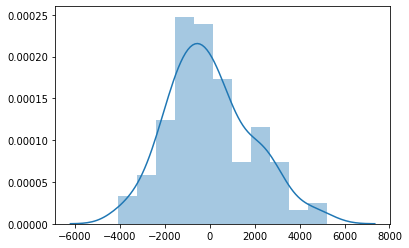

In [234]:
#to check error terms are normal disturbuted of not
sns.distplot(y_train-y_train_predict)

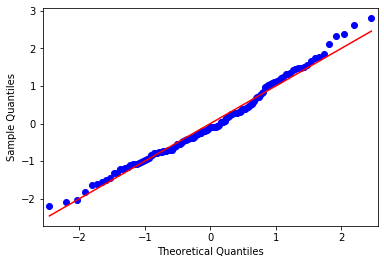

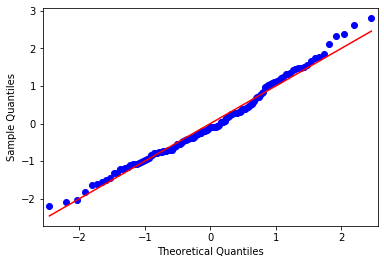

In [235]:
#Q-Q plot to check error terms are normal distributed or not
sm.graphics.qqplot(model.resid,line='s',fit=True)

In [236]:
#predictors from model
X_train_scaled_sm.columns

Index(['const', 'aspiration', 'wheelbase', 'enginesize', 'boreratio',
       'peakrpm', 'convertible', 'spdi', 'audi', 'bmw', 'buick', 'jaguar',
       'mazda', 'porsche', 'saab', 'subaru', 'volvo'],
      dtype='object')

In [237]:
Model_features= ['aspiration', 'wheelbase', 'enginesize', 'boreratio',
       'peakrpm', 'convertible', 'spdi', 'audi', 'bmw', 'buick', 'jaguar',
       'mazda', 'porsche', 'saab', 'subaru', 'volvo']

In [238]:
#model evaluation using test data
X_test_scaled=X_test_scaled[Model_features]

In [239]:
#adding constant to test data since test data has column which are constant so forcifully add constant using has_constant='add'
X_test_scaled_sm=sm.add_constant(X_test_scaled,has_constant='add')

In [240]:
y_predict=model.predict(X_test_scaled_sm)

In [241]:
from sklearn.metrics import r2_score

In [242]:
#r2 score is around 90
r2_score(y_test,y_predict)

0.8994246108585544

In [243]:
model.params

const           3788.064092
aspiration     -3153.054486
wheelbase       8918.303956
enginesize     28669.208004
boreratio      -3552.439278
peakrpm         5260.540943
convertible     5953.746840
spdi           -2131.911690
audi            3274.012159
bmw             8629.754200
buick           8768.703288
jaguar          4946.033664
mazda           3137.494599
porsche        14429.464563
saab            3377.570980
subaru          1757.511080
volvo           1852.318015
dtype: float64

## Model without carname
- Just to check which components of car are driving variables in car price other than brand name

In [244]:
#using features selected by rfe
X_train_withoutcar_scaled=X_train_withoutcar_scaled[final_features_withoutcar]

In [245]:
#adding constant and fitting the model
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [246]:
#viewing the summary of statsmodel
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     68.58
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.37e-58
Time:                        22:12:01   Log-Likelihood:                -1285.7
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     115   BIC:                             2710.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.276e+04   4921.288      4.626      0.000     1.3e+04    3.25e+04
symboling         1949.6192   1144.656      1.703      0.091    -317.724    4216.963
fueltype           503.1005   3045.158      0.165      0.869   -5528.772    6534.973
aspiration       -1380.8946   1081.299     -1.277      0.204   -3522.741     760.951
enginelocation   -1.293e+04   2497.387     -5.177      0.000   -1.79e+04   -7981.539
wheelbase         4952.6992   3213.985      1.541      0.126   -1413.586    1.13e+04
carlength        -6572.0390   3298.301     -1.993      0.049   -1.31e+04     -38.739
carwidth          1.004e+04   2650.280      3.790      0.000    4794.772    1.53e+04
carheight         2931.8040   1545.449      1.897      0.060    -129.432    5993.040
curbweight        7695.8530   3744.167      2.055      0.042     279.379    1.51e+04
enginesize        3.683e+04   5152.128      7.148      0.000    2.66e+04     4.7e+04
boreratio        -5799.8379   1661.158     -3.491      0.001   -9090.273   -2509.403
stroke           -8163.7027   1908.377     -4.278      0.000   -1.19e+04   -4383.576
compressionratio  -2.57e+04   7536.384     -3.410      0.001   -4.06e+04   -1.08e+04
horsepower       -4452.0483   5073.639     -0.877      0.382   -1.45e+04    5597.854
peakrpm           4794.6428   1815.211      2.641      0.009    1199.060    8390.226
citympg          -2601.0277   6201.963     -0.419      0.676   -1.49e+04    9683.868
highwaympg        5361.9064   5938.394      0.903      0.368   -6400.909    1.71e+04
convertible       3770.0755   1279.635      2.946      0.004    1235.365    6304.786
sedan             1557.7586    443.807      3.510      0.001     678.662    2436.855
rwd               2116.5847    752.097      2.814      0.006     626.825    3606.345
ohc              -6174.3212   3536.178     -1.746      0.083   -1.32e+04     830.167
ohcf             -1.071e+04   3922.639     -2.731      0.007   -1.85e+04   -2942.358
ohcv             -4753.2198   3538.203     -1.343      0.182   -1.18e+04    2255.279
dohc             -5004.2208   3731.734     -1.341      0.183   -1.24e+04    2387.626
l                -8741.9763   3467.363     -2.521      0.013   -1.56e+04   -1873.797
rotor             1234.4244   1982.367      0.623      0.535   -2692.262    5161.111
4bbl              1234.4244   1982.367      0.623      0.535   -2692.262    5161.111
idi               2.226e+04   4990.918      4.460      0.000    1.24e+04    3.21e+04
spdi             -2775.3204   1186.059     -2.340      0.021   -5124.675    -425.966
==============================================================================
Omnibus:                        4.339   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.926
Skew:                           0.309   P

In [247]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
26,rotor,inf
2,fueltype,inf
27,4bbl,inf
28,idi,inf
13,compressionratio,100.76
23,ohcv,79.06
16,citympg,36.91
17,highwaympg,33.07
24,dohc,32.59
14,horsepower,25.28


In [248]:
# removing fueltype because of high p value and vif

In [249]:
X_train_withoutcar_scaled.drop('fueltype',axis=1,inplace=True)

In [250]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [251]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     68.58
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.37e-58
Time:                        22:12:03   Log-Likelihood:                -1285.7
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     115   BIC:                             2710.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.327e+04   6486.513      3.587      0.000    1.04e+04    3.61e+04
symboling         1949.6192   1144.656      1.703      0.091    -317.724    4216.963
aspiration       -1380.8946   1081.299     -1.277      0.204   -3522.741     760.951
enginelocation   -1.293e+04   2497.387     -5.177      0.000   -1.79e+04   -7981.539
wheelbase         4952.6992   3213.985      1.541      0.126   -1413.586    1.13e+04
carlength        -6572.0390   3298.301     -1.993      0.049   -1.31e+04     -38.739
carwidth          1.004e+04   2650.280      3.790      0.000    4794.772    1.53e+04
carheight         2931.8040   1545.449      1.897      0.060    -129.432    5993.040
curbweight        7695.8530   3744.167      2.055      0.042     279.379    1.51e+04
enginesize        3.683e+04   5152.128      7.148      0.000    2.66e+04     4.7e+04
boreratio        -5799.8379   1661.158     -3.491      0.001   -9090.273   -2509.403
stroke           -8163.7027   1908.377     -4.278      0.000   -1.19e+04   -4383.576
compressionratio  -2.57e+04   7536.384     -3.410      0.001   -4.06e+04   -1.08e+04
horsepower       -4452.0483   5073.639     -0.877      0.382   -1.45e+04    5597.854
peakrpm           4794.6428   1815.211      2.641      0.009    1199.060    8390.226
citympg          -2601.0277   6201.963     -0.419      0.676   -1.49e+04    9683.868
highwaympg        5361.9064   5938.394      0.903      0.368   -6400.909    1.71e+04
convertible       3770.0755   1279.635      2.946      0.004    1235.365    6304.786
sedan             1557.7586    443.807      3.510      0.001     678.662    2436.855
rwd               2116.5847    752.097      2.814      0.006     626.825    3606.345
ohc              -6174.3212   3536.178     -1.746      0.083   -1.32e+04     830.167
ohcf             -1.071e+04   3922.639     -2.731      0.007   -1.85e+04   -2942.358
ohcv             -4753.2198   3538.203     -1.343      0.182   -1.18e+04    2255.279
dohc             -5004.2208   3731.734     -1.341      0.183   -1.24e+04    2387.626
l                -8741.9763   3467.363     -2.521      0.013   -1.56e+04   -1873.797
rotor             1234.4244   1982.367      0.623      0.535   -2692.262    5161.111
4bbl              1234.4244   1982.367      0.623      0.535   -2692.262    5161.111
idi               2.176e+04   6644.203      3.275      0.001    8596.468    3.49e+04
spdi             -2775.3204   1186.059     -2.340      0.021   -5124.675    -425.966
==============================================================================
Omnibus:                        4.339   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.926
Skew:                           0.309   Prob(JB):                        0.140
Kurtosis:                       3.526   Cond. N

In [252]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
26,4bbl,inf
25,rotor,inf
0,const,1280.86
27,idi,111.07
12,compressionratio,100.76
22,ohcv,79.06
15,citympg,36.91
16,highwaympg,33.07
23,dohc,32.59
13,horsepower,25.28


In [253]:
# removing 4bbl because of high p value and vif

In [254]:
X_train_withoutcar_scaled.drop('4bbl',axis=1,inplace=True)

In [255]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [256]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     68.58
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.37e-58
Time:                        22:12:04   Log-Likelihood:                -1285.7
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     115   BIC:                             2710.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.327e+04   6486.513      3.587      0.000    1.04e+04    3.61e+04
symboling         1949.6192   1144.656      1.703      0.091    -317.724    4216.963
aspiration       -1380.8946   1081.299     -1.277      0.204   -3522.741     760.951
enginelocation   -1.293e+04   2497.387     -5.177      0.000   -1.79e+04   -7981.539
wheelbase         4952.6992   3213.985      1.541      0.126   -1413.586    1.13e+04
carlength        -6572.0390   3298.301     -1.993      0.049   -1.31e+04     -38.739
carwidth          1.004e+04   2650.280      3.790      0.000    4794.772    1.53e+04
carheight         2931.8040   1545.449      1.897      0.060    -129.432    5993.040
curbweight        7695.8530   3744.167      2.055      0.042     279.379    1.51e+04
enginesize        3.683e+04   5152.128      7.148      0.000    2.66e+04     4.7e+04
boreratio        -5799.8379   1661.158     -3.491      0.001   -9090.273   -2509.403
stroke           -8163.7027   1908.377     -4.278      0.000   -1.19e+04   -4383.576
compressionratio  -2.57e+04   7536.384     -3.410      0.001   -4.06e+04   -1.08e+04
horsepower       -4452.0483   5073.639     -0.877      0.382   -1.45e+04    5597.854
peakrpm           4794.6428   1815.211      2.641      0.009    1199.060    8390.226
citympg          -2601.0277   6201.963     -0.419      0.676   -1.49e+04    9683.868
highwaympg        5361.9064   5938.394      0.903      0.368   -6400.909    1.71e+04
convertible       3770.0755   1279.635      2.946      0.004    1235.365    6304.786
sedan             1557.7586    443.807      3.510      0.001     678.662    2436.855
rwd               2116.5847    752.097      2.814      0.006     626.825    3606.345
ohc              -6174.3212   3536.178     -1.746      0.083   -1.32e+04     830.167
ohcf             -1.071e+04   3922.639     -2.731      0.007   -1.85e+04   -2942.358
ohcv             -4753.2198   3538.203     -1.343      0.182   -1.18e+04    2255.279
dohc             -5004.2208   3731.734     -1.341      0.183   -1.24e+04    2387.626
l                -8741.9763   3467.363     -2.521      0.013   -1.56e+04   -1873.797
rotor             2468.8487   3964.733      0.623      0.535   -5384.524    1.03e+04
idi               2.176e+04   6644.203      3.275      0.001    8596.468    3.49e+04
spdi             -2775.3204   1186.059     -2.340      0.021   -5124.675    -425.966
==============================================================================
Omnibus:                        4.339   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                3.926
Skew:                           0.309   Prob(JB):                        0.140
Kurtosis:                       3.526   Cond. No.                         150.
=====================================================

In [257]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,1280.86
26,idi,111.07
12,compressionratio,100.76
22,ohcv,79.06
15,citympg,36.91
16,highwaympg,33.07
23,dohc,32.59
13,horsepower,25.28
20,ohc,24.76
24,l,23.80


In [258]:
# removing citympg because of high p value and vif

In [259]:
X_train_withoutcar_scaled.drop('citympg',axis=1,inplace=True)

In [260]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [261]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     71.72
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.74e-59
Time:                        22:12:06   Log-Likelihood:                -1285.9
No. Observations:                 143   AIC:                             2626.
Df Residuals:                     116   BIC:                             2706.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.325e+04   6463.236      3.597      0.000    1.04e+04     3.6e+04
symboling         2073.2611   1102.103      1.881      0.062    -109.592    4256.114
aspiration       -1195.8818    983.703     -1.216      0.227   -3144.229     752.466
enginelocation   -1.311e+04   2451.881     -5.346      0.000    -1.8e+04   -8251.141
wheelbase         4972.8847   3202.188      1.553      0.123   -1369.453    1.13e+04
carlength        -6262.7542   3203.359     -1.955      0.053   -1.26e+04      81.902
carwidth          9862.6347   2605.272      3.786      0.000    4702.566     1.5e+04
carheight         2815.8643   1515.111      1.859      0.066    -185.004    5816.733
curbweight        7834.5156   3716.269      2.108      0.037     473.978    1.52e+04
enginesize        3.609e+04   4825.011      7.480      0.000    2.65e+04    4.56e+04
boreratio        -5705.7678   1640.088     -3.479      0.001   -8954.169   -2457.367
stroke           -8196.6698   1899.972     -4.314      0.000    -1.2e+04   -4433.536
compressionratio -2.661e+04   7193.117     -3.699      0.000   -4.09e+04   -1.24e+04
horsepower       -3564.7679   4595.076     -0.776      0.439   -1.27e+04    5536.360
peakrpm           4647.7179   1774.745      2.619      0.010    1132.612    8162.824
highwaympg        3206.0962   2962.814      1.082      0.281   -2662.130    9074.322
convertible       3770.7646   1275.080      2.957      0.004    1245.307    6296.222
sedan             1588.5099    436.151      3.642      0.000     724.659    2452.361
rwd               2070.3343    741.321      2.793      0.006     602.055    3538.613
ohc              -6304.1728   3510.062     -1.796      0.075   -1.33e+04     647.946
ohcf             -1.079e+04   3904.040     -2.764      0.007   -1.85e+04   -3060.048
ohcv             -4780.7414   3525.005     -1.356      0.178   -1.18e+04    2200.976
dohc             -5166.7671   3698.344     -1.397      0.165   -1.25e+04    2158.270
l                -8784.2419   3453.565     -2.544      0.012   -1.56e+04   -1944.022
rotor             2464.5304   3950.611      0.624      0.534   -5360.153    1.03e+04
idi               2.251e+04   6375.822      3.530      0.001    9879.865    3.51e+04
spdi             -2781.0879   1181.759     -2.353      0.020   -5121.710    -440.465
==============================================================================
Omnibus:                        4.877   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.528
Skew:                           0.330   Prob(JB):                        0.104
Kurtosis:                       3.568   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

In [262]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,1280.78
25,idi,103.01
12,compressionratio,92.45
21,ohcv,79.03
22,dohc,32.24
19,ohc,24.57
23,l,23.78
20,ohcf,21.76
13,horsepower,20.88
8,curbweight,19.67


In [263]:
# removing ohcv because of high p value and vif

In [264]:
X_train_withoutcar_scaled.drop('ohcv',axis=1,inplace=True)

In [265]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [266]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     73.99
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.91e-60
Time:                        22:12:08   Log-Likelihood:                -1287.0
No. Observations:                 143   AIC:                             2626.
Df Residuals:                     117   BIC:                             2703.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.66e+04   4229.643      3.925      0.000    8223.274     2.5e+04
symboling         1926.8965   1100.733      1.751      0.083    -253.048    4106.842
aspiration        -624.3794    892.060     -0.700      0.485   -2391.058    1142.299
enginelocation   -1.205e+04   2332.504     -5.165      0.000   -1.67e+04   -7428.832
wheelbase         4965.0446   3213.649      1.545      0.125   -1399.419    1.13e+04
carlength        -7344.1989   3113.638     -2.359      0.020   -1.35e+04   -1177.803
carwidth          1.071e+04   2537.700      4.222      0.000    5687.498    1.57e+04
carheight         2980.8687   1515.626      1.967      0.052     -20.749    5982.486
curbweight        7922.7246   3729.004      2.125      0.036     537.628    1.53e+04
enginesize        3.402e+04   4594.691      7.405      0.000    2.49e+04    4.31e+04
boreratio        -5511.5305   1639.673     -3.361      0.001   -8758.817   -2264.244
stroke           -8235.8668   1906.554     -4.320      0.000    -1.2e+04   -4460.036
compressionratio -2.593e+04   7201.392     -3.601      0.000   -4.02e+04   -1.17e+04
horsepower         334.5297   3597.330      0.093      0.926   -6789.794    7458.853
peakrpm           4305.1709   1762.971      2.442      0.016     813.699    7796.642
highwaympg        3801.1609   2940.637      1.293      0.199   -2022.618    9624.939
convertible       3927.7727   1274.361      3.082      0.003    1403.968    6451.578
sedan             1539.0025    436.177      3.528      0.001     675.178    2402.827
rwd               1919.6964    735.577      2.610      0.010     462.924    3376.468
ohc              -1726.1417    965.871     -1.787      0.077   -3638.998     186.714
ohcf             -5750.3929   1195.964     -4.808      0.000   -8118.937   -3381.849
dohc              -435.7741   1232.953     -0.353      0.724   -2877.573    2006.025
l                -4358.3187   1134.278     -3.842      0.000   -6604.697   -2111.941
rotor             7071.5101   2024.275      3.493      0.001    3062.540    1.11e+04
idi               2.241e+04   6398.273      3.503      0.001    9742.400    3.51e+04
spdi             -2622.9477   1180.203     -2.222      0.028   -4960.278    -285.617
==============================================================================
Omnibus:                        3.059   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.587
Skew:                           0.243   Prob(JB):                        0.274
Kurtosis:                       3.445   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
VIF(X_train_withoutcar_scaled)

,Features,VIF
11,compressionratio,150.32
23,idi,113.10
4,carlength,82.76
7,curbweight,76.20
2,enginelocation,69.32
3,wheelbase,68.30
8,enginesize,49.77
5,carwidth,36.27
10,stroke,30.79
14,highwaympg,30.43


In [268]:
# removing horsepower because of high p value and vif

In [269]:
X_train_withoutcar_scaled.drop('horsepower',axis=1,inplace=True)

In [270]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [271]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     77.72
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           5.52e-61
Time:                        22:12:10   Log-Likelihood:                -1287.0
No. Observations:                 143   AIC:                             2624.
Df Residuals:                     118   BIC:                             2698.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.67e+04   4081.825      4.091      0.000    8613.708    2.48e+04
symboling         1913.4009   1086.532      1.761      0.081    -238.228    4065.030
aspiration        -664.5044    777.480     -0.855      0.394   -2204.127     875.118
enginelocation   -1.209e+04   2268.919     -5.331      0.000   -1.66e+04   -7601.555
wheelbase         4861.9354   3003.619      1.619      0.108   -1086.047    1.08e+04
carlength        -7364.8630   3092.625     -2.381      0.019   -1.35e+04   -1240.624
carwidth          1.078e+04   2413.779      4.467      0.000    6003.193    1.56e+04
carheight         2985.6754   1508.368      1.979      0.050      -1.304    5972.655
curbweight        7979.6419   3662.947      2.178      0.031     726.009    1.52e+04
enginesize        3.424e+04   3923.901      8.727      0.000    2.65e+04     4.2e+04
boreratio        -5486.9690   1611.449     -3.405      0.001   -8678.076   -2295.862
stroke           -8263.7614   1874.884     -4.408      0.000    -1.2e+04   -4550.981
compressionratio -2.586e+04   7133.406     -3.625      0.000      -4e+04   -1.17e+04
peakrpm           4361.2058   1649.824      2.643      0.009    1094.105    7628.307
highwaympg        3767.9487   2906.582      1.296      0.197   -1987.875    9523.773
convertible       3895.2389   1220.240      3.192      0.002    1478.832    6311.646
sedan             1539.6256    434.289      3.545      0.001     679.615    2399.636
rwd               1931.0763    722.273      2.674      0.009     500.779    3361.374
ohc              -1711.3486    948.671     -1.804      0.074   -3589.974     167.277
ohcf             -5759.2705   1187.129     -4.851      0.000   -8110.110   -3408.431
dohc              -450.6924   1217.326     -0.370      0.712   -2861.330    1959.945
l                -4376.1947   1113.165     -3.931      0.000   -6580.564   -2171.825
rotor             7080.2337   2013.588      3.516      0.001    3092.781    1.11e+04
idi               2.232e+04   6289.401      3.549      0.001    9864.000    3.48e+04
spdi             -2622.9211   1175.235     -2.232      0.028   -4950.207    -295.636
==============================================================================
Omnibus:                        3.025   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.545
Skew:                           0.244   Prob(JB):                        0.280
Kurtosis:                       3.435   Cond. No.                         124.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,511.50
23,idi,100.36
12,compressionratio,91.04
8,curbweight,19.14
9,enginesize,12.20
5,carlength,11.94
4,wheelbase,11.60
14,highwaympg,7.99
6,carwidth,7.52
17,rwd,3.79


In [273]:
#plotting heatmap to check the correlation between dependent variables

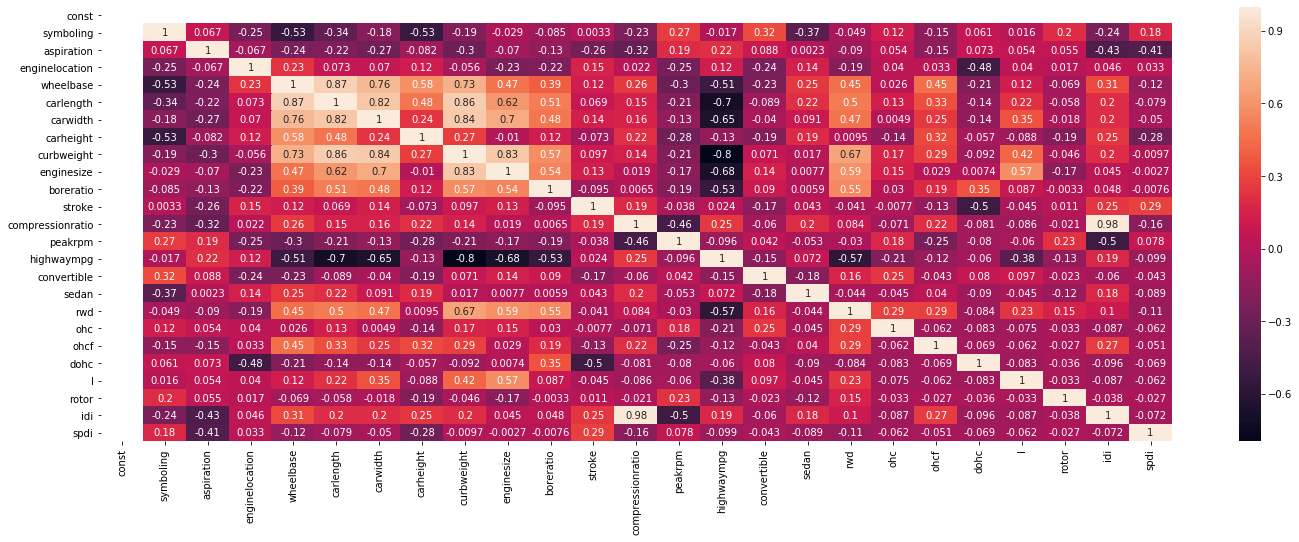

In [274]:
plt.figure(figsize=(24,8))
sns.heatmap(X_train_withoutcar_scaled_sm.corr(),annot=True)

In [275]:
# removing wheelbase because of high p value and vif

In [276]:
X_train_withoutcar_scaled.drop('wheelbase',axis=1,inplace=True)

In [277]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [278]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     79.90
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.19e-61
Time:                        22:12:13   Log-Likelihood:                -1288.6
No. Observations:                 143   AIC:                             2625.
Df Residuals:                     119   BIC:                             2696.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.623e+04   4099.272      3.959      0.000    8113.588    2.43e+04
symboling         1182.4761    994.962      1.188      0.237    -787.647    3152.599
aspiration        -615.0988    782.151     -0.786      0.433   -2163.837     933.639
enginelocation   -1.109e+04   2197.326     -5.047      0.000   -1.54e+04   -6739.849
carlength        -5170.9631   2798.670     -1.848      0.067   -1.07e+04     370.683
carwidth          1.228e+04   2245.526      5.467      0.000    7830.591    1.67e+04
carheight         3861.2328   1417.600      2.724      0.007    1054.243    6668.222
curbweight        6885.1072   3624.418      1.900      0.060    -291.603    1.41e+04
enginesize        3.554e+04   3867.078      9.191      0.000    2.79e+04    4.32e+04
boreratio        -6036.7281   1585.939     -3.806      0.000   -9177.045   -2896.411
stroke           -7981.9564   1879.449     -4.247      0.000   -1.17e+04   -4260.461
compressionratio -2.695e+04   7149.523     -3.770      0.000   -4.11e+04   -1.28e+04
peakrpm           4322.4811   1660.843      2.603      0.010    1033.847    7611.115
highwaympg        3689.4621   2925.894      1.261      0.210   -2104.101    9483.025
convertible       3577.1127   1212.480      2.950      0.004    1176.282    5977.944
sedan             1531.2344    437.204      3.502      0.001     665.526    2396.943
rwd               2288.5052    692.357      3.305      0.001     917.568    3659.442
ohc              -1728.1172    955.050     -1.809      0.073   -3619.211     162.977
ohcf             -5081.2758   1118.319     -4.544      0.000   -7295.658   -2866.893
dohc              -279.8231   1220.968     -0.229      0.819   -2697.463    2137.816
l                -4801.3811   1089.069     -4.409      0.000   -6957.846   -2644.916
rotor             7386.5474   2018.277      3.660      0.000    3390.158    1.14e+04
idi               2.336e+04   6298.853      3.709      0.000    1.09e+04    3.58e+04
spdi             -2595.2992   1183.084     -2.194      0.030   -4937.923    -252.675
==============================================================================
Omnibus:                        2.791   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.382
Skew:                           0.200   Prob(JB):                        0.304
Kurtosis:                       3.490   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,508.95
22,idi,99.31
11,compressionratio,90.22
7,curbweight,18.49
8,enginesize,11.69
4,carlength,9.64
13,highwaympg,7.99
5,carwidth,6.42
19,dohc,3.47
16,rwd,3.44


In [280]:
# removing dohc because of high p value

In [281]:
X_train_withoutcar_scaled.drop('dohc',axis=1,inplace=True)

In [282]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [283]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     84.19
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.42e-62
Time:                        22:12:13   Log-Likelihood:                -1288.6
No. Observations:                 143   AIC:                             2623.
Df Residuals:                     120   BIC:                             2691.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.564e+04   3191.342      4.902      0.000    9325.902     2.2e+04
symboling         1218.1585    978.817      1.245      0.216    -719.831    3156.148
aspiration        -629.1682    776.654     -0.810      0.419   -2166.889     908.553
enginelocation   -1.082e+04   1844.669     -5.865      0.000   -1.45e+04   -7167.445
carlength        -5003.4956   2690.906     -1.859      0.065   -1.03e+04     324.311
carwidth          1.222e+04   2221.599      5.499      0.000    7818.756    1.66e+04
carheight         3898.0787   1402.882      2.779      0.006    1120.469    6675.688
curbweight        6928.5950   3605.130      1.922      0.057    -209.312    1.41e+04
enginesize        3.563e+04   3834.793      9.290      0.000     2.8e+04    4.32e+04
boreratio        -6212.6505   1382.305     -4.494      0.000   -8949.517   -3475.783
stroke           -7768.6836   1626.433     -4.777      0.000    -1.1e+04   -4548.459
compressionratio -2.693e+04   7120.538     -3.782      0.000    -4.1e+04   -1.28e+04
peakrpm           4445.8233   1565.012      2.841      0.005    1347.209    7544.437
highwaympg        3905.9551   2758.255      1.416      0.159   -1555.198    9367.108
convertible       3641.4998   1174.816      3.100      0.002    1315.445    5967.554
sedan             1529.1876    435.384      3.512      0.001     667.157    2391.218
rwd               2351.6549    632.652      3.717      0.000    1099.048    3604.262
ohc              -1767.3555    935.861     -1.888      0.061   -3620.296      85.585
ohcf             -5055.3152   1108.166     -4.562      0.000   -7249.407   -2861.224
l                -4794.3929   1084.335     -4.422      0.000   -6941.301   -2647.484
rotor             7393.0248   2010.096      3.678      0.000    3413.175    1.14e+04
idi               2.331e+04   6269.971      3.718      0.000    1.09e+04    3.57e+04
spdi             -2592.3188   1178.333     -2.200      0.030   -4925.335    -259.302
==============================================================================
Omnibus:                        3.033   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.219   Jarque-Bera (JB):                2.653
Skew:                           0.210   Prob(JB):                        0.265
Kurtosis:                       3.519   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,310.92
21,idi,99.19
11,compressionratio,90.20
7,curbweight,18.44
8,enginesize,11.59
4,carlength,8.99
13,highwaympg,7.16
5,carwidth,6.34
16,rwd,2.89
6,carheight,2.68


In [285]:
# removing highwaympg because of high p value and vif

In [286]:
X_train_withoutcar_scaled.drop('highwaympg',axis=1,inplace=True)

In [287]:
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [288]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     87.38
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           6.82e-63
Time:                        22:12:15   Log-Likelihood:                -1289.8
No. Observations:                 143   AIC:                             2624.
Df Residuals:                     121   BIC:                             2689.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.79e+04   2777.559      6.444      0.000    1.24e+04    2.34e+04
symboling          982.9654    968.622      1.015      0.312    -934.678    2900.609
aspiration        -448.1917    769.243     -0.583      0.561   -1971.111    1074.728
enginelocation   -1.081e+04   1852.309     -5.837      0.000   -1.45e+04   -7145.322
carlength        -6028.6371   2602.445     -2.317      0.022   -1.12e+04    -876.411
carwidth          1.265e+04   2209.211      5.728      0.000    8280.366     1.7e+04
carheight         3757.0518   1405.144      2.674      0.009     975.198    6538.906
curbweight        5359.8733   3444.935      1.556      0.122   -1460.285    1.22e+04
enginesize        3.502e+04   3826.737      9.152      0.000    2.74e+04    4.26e+04
boreratio        -6414.5478   1380.632     -4.646      0.000   -9147.874   -3681.222
stroke           -7285.4299   1596.821     -4.562      0.000   -1.04e+04   -4124.101
compressionratio -2.369e+04   6770.079     -3.499      0.001   -3.71e+04   -1.03e+04
peakrpm           3887.3194   1520.779      2.556      0.012     876.536    6898.103
convertible       3474.2480   1173.710      2.960      0.004    1150.579    5797.917
sedan             1530.2428    437.188      3.500      0.001     664.713    2395.773
rwd               2346.1072    635.263      3.693      0.000    1088.438    3603.777
ohc              -1833.9830    938.553     -1.954      0.053   -3692.096      24.130
ohcf             -4811.1426   1099.208     -4.377      0.000   -6987.314   -2634.971
l                -4949.4626   1083.264     -4.569      0.000   -7094.070   -2804.855
rotor             6424.0669   1897.887      3.385      0.001    2666.700    1.02e+04
idi               2.116e+04   6109.559      3.464      0.001    9068.828    3.33e+04
spdi             -2531.7445   1182.438     -2.141      0.034   -4872.692    -190.797
==============================================================================
Omnibus:                        3.402   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                3.096
Skew:                           0.221   Prob(JB):                        0.213
Kurtosis:                       3.570   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [289]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,233.58
20,idi,93.40
11,compressionratio,80.87
7,curbweight,16.69
8,enginesize,11.45
4,carlength,8.34
5,carwidth,6.22
15,rwd,2.89
6,carheight,2.66
2,aspiration,2.58


In [290]:
# removing idi because of high p value

In [291]:
X_train_withoutcar_scaled.drop('idi',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [292]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     83.61
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.11e-61
Time:                        22:12:16   Log-Likelihood:                -1296.5
No. Observations:                 143   AIC:                             2635.
Df Residuals:                     122   BIC:                             2697.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.549e+04   2807.505      5.516      0.000    9929.108     2.1e+04
symboling          681.0816   1007.247      0.676      0.500   -1312.864    2675.027
aspiration       -1642.6422    717.968     -2.288      0.024   -3063.932    -221.352
enginelocation   -1.102e+04   1933.006     -5.701      0.000   -1.48e+04   -7193.137
carlength        -5973.7826   2717.188     -2.199      0.030   -1.14e+04    -594.837
carwidth          1.269e+04   2306.637      5.501      0.000    8121.885    1.73e+04
carheight         4228.8418   1460.218      2.896      0.004    1338.195    7119.488
curbweight        6562.8813   3578.568      1.834      0.069    -521.252    1.36e+04
enginesize        3.343e+04   3966.625      8.427      0.000    2.56e+04    4.13e+04
boreratio        -5916.3937   1433.691     -4.127      0.000   -8754.529   -3078.259
stroke           -5206.8812   1545.076     -3.370      0.001   -8265.514   -2148.249
compressionratio  -513.6125   1086.445     -0.473      0.637   -2664.339    1637.114
peakrpm           2356.4024   1519.337      1.551      0.124    -651.278    5364.083
convertible       4272.5901   1201.627      3.556      0.001    1893.850    6651.330
sedan             1440.9061    455.678      3.162      0.002     538.846    2342.966
rwd               2259.5834    662.771      3.409      0.001     947.562    3571.605
ohc              -1964.0024    979.168     -2.006      0.047   -3902.364     -25.641
ohcf             -3873.1510   1112.327     -3.482      0.001   -6075.114   -1671.188
l                -4819.3258   1130.367     -4.264      0.000   -7056.999   -2581.652
rotor             6402.9893   1981.592      3.231      0.002    2480.230    1.03e+04
spdi             -1228.6817   1170.458     -1.050      0.296   -3545.720    1088.356
==============================================================================
Omnibus:                        4.467   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                5.468
Skew:                           0.129   Prob(JB):                       0.0650
Kurtosis:                       3.923   Cond. No.                         60.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,218.91
7,curbweight,16.52
8,enginesize,11.28
4,carlength,8.34
5,carwidth,6.22
15,rwd,2.89
6,carheight,2.64
18,l,2.31
12,peakrpm,2.22
9,boreratio,2.14


In [294]:
# removing curbweight because of high p value and vif

In [295]:
X_train_withoutcar_scaled.drop('curbweight',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [296]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     86.18
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.15e-61
Time:                        22:12:17   Log-Likelihood:                -1298.5
No. Observations:                 143   AIC:                             2637.
Df Residuals:                     123   BIC:                             2696.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.538e+04   2833.726      5.427      0.000    9769.783     2.1e+04
symboling          459.4134   1009.529      0.455      0.650   -1538.888    2457.715
aspiration       -2135.9942    672.030     -3.178      0.002   -3466.237    -805.751
enginelocation   -1.072e+04   1944.514     -5.513      0.000   -1.46e+04   -6871.235
carlength        -3702.2889   2441.598     -1.516      0.132   -8535.282    1130.705
carwidth          1.359e+04   2275.206      5.973      0.000    9085.900    1.81e+04
carheight         4796.0025   1440.738      3.329      0.001    1944.150    7647.855
enginesize        3.744e+04   3340.161     11.209      0.000    3.08e+04    4.41e+04
boreratio        -5973.1460   1447.062     -4.128      0.000   -8837.517   -3108.775
stroke           -5382.8880   1556.837     -3.458      0.001   -8464.551   -2301.225
compressionratio  -452.6176   1096.319     -0.413      0.680   -2622.714    1717.479
peakrpm           2466.3773   1532.669      1.609      0.110    -567.447    5500.202
convertible       4621.3991   1197.823      3.858      0.000    2250.382    6992.416
sedan             1210.9474    442.275      2.738      0.007     335.491    2086.404
rwd               2596.6114    642.872      4.039      0.000    1324.086    3869.137
ohc              -1762.1240    982.264     -1.794      0.075   -3706.455     182.207
ohcf             -3464.0264   1100.146     -3.149      0.002   -5641.698   -1286.354
l                -4655.1853   1137.592     -4.092      0.000   -6906.978   -2403.393
rotor             7120.4280   1961.167      3.631      0.000    3238.417     1.1e+04
spdi             -1083.4275   1178.940     -0.919      0.360   -3417.068    1250.213
==============================================================================
Omnibus:                        1.793   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.451
Skew:                          -0.039   Prob(JB):                        0.484
Kurtosis:                       3.487   Cond. No.                         50.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [297]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,218.81
7,enginesize,7.85
4,carlength,6.60
5,carwidth,5.93
14,rwd,2.67
6,carheight,2.52
17,l,2.29
11,peakrpm,2.22
8,boreratio,2.14
3,enginelocation,2.12


In [298]:
# removing carlength because of high p value and vif

In [299]:
X_train_withoutcar_scaled.drop('carlength',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [300]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     89.90
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.70e-62
Time:                        22:12:18   Log-Likelihood:                -1299.8
No. Observations:                 143   AIC:                             2638.
Df Residuals:                     124   BIC:                             2694.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.512e+04   2843.477      5.319      0.000    9495.013    2.08e+04
symboling          562.2152   1012.514      0.555      0.580   -1441.833    2566.263
aspiration       -2141.8742    675.531     -3.171      0.002   -3478.939    -804.810
enginelocation   -1.075e+04   1954.564     -5.501      0.000   -1.46e+04   -6883.046
carwidth          1.156e+04   1848.353      6.253      0.000    7899.241    1.52e+04
carheight         3637.5348   1227.876      2.962      0.004    1207.225    6067.845
enginesize        3.657e+04   3307.254     11.057      0.000       3e+04    4.31e+04
boreratio        -6161.2165   1449.271     -4.251      0.000   -9029.729   -3292.704
stroke           -5293.6108   1563.853     -3.385      0.001   -8388.913   -2198.308
compressionratio  -255.2823   1094.256     -0.233      0.816   -2421.121    1910.556
peakrpm           2670.4042   1534.729      1.740      0.084    -367.255    5708.064
convertible       4798.0422   1198.374      4.004      0.000    2426.124    7169.961
sedan             1045.3945    430.827      2.426      0.017     192.668    1898.121
rwd               2504.3457    643.330      3.893      0.000    1231.015    3777.676
ohc              -2233.4100    936.664     -2.384      0.019   -4087.331    -379.489
ohcf             -3668.0465   1097.593     -3.342      0.001   -5840.491   -1495.602
l                -4507.9858   1139.365     -3.957      0.000   -6763.108   -2252.864
rotor             6646.1281   1946.179      3.415      0.001    2794.094    1.05e+04
spdi             -1343.9967   1172.444     -1.146      0.254   -3664.592     976.599
==============================================================================
Omnibus:                        2.508   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.285   Jarque-Bera (JB):                2.412
Skew:                          -0.039   Prob(JB):                        0.299
Kurtosis:                       3.631   Cond. No.                         48.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [301]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,218.04
6,enginesize,7.62
4,carwidth,3.88
13,rwd,2.64
16,l,2.28
10,peakrpm,2.20
7,boreratio,2.13
3,enginelocation,2.12
9,compressionratio,1.88
1,symboling,1.81


In [302]:
# removing compressionratio because of high p value

In [303]:
X_train_withoutcar_scaled.drop('compressionratio',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [304]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     95.91
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           3.81e-63
Time:                        22:12:19   Log-Likelihood:                -1299.8
No. Observations:                 143   AIC:                             2636.
Df Residuals:                     125   BIC:                             2689.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.486e+04   2603.452      5.708      0.000    9709.069       2e+04
symboling        578.5436   1006.264      0.575      0.566   -1412.977    2570.065
aspiration     -2098.5304    647.018     -3.243      0.002   -3379.060    -818.001
enginelocation -1.063e+04   1874.895     -5.669      0.000   -1.43e+04   -6917.955
carwidth        1.149e+04   1818.441      6.319      0.000    7890.922    1.51e+04
carheight       3652.3471   1221.586      2.990      0.003    1234.676    6070.018
enginesize      3.669e+04   3255.203     11.270      0.000    3.02e+04    4.31e+04
boreratio      -6101.1861   1420.840     -4.294      0.000   -8913.204   -3289.168
stroke         -5379.4181   1514.224     -3.553      0.001   -8376.255   -2382.581
peakrpm         2838.6279   1349.648      2.103      0.037     167.507    5509.749
convertible     4790.0752   1193.348      4.014      0.000    2428.291    7151.859
sedan           1024.5991    419.907      2.440      0.016     193.551    1855.648
rwd             2489.4325    637.720      3.904      0.000    1227.305    3751.560
ohc            -2247.1008    931.282     -2.413      0.017   -4090.223    -403.979
ohcf           -3678.7521   1092.478     -3.367      0.001   -5840.901   -1516.603
l              -4508.5938   1135.044     -3.972      0.000   -6754.987   -2262.201
rotor           6611.9161   1933.292      3.420      0.001    2785.691    1.04e+04
spdi           -1275.6964   1131.001     -1.128      0.262   -3514.088     962.695
==============================================================================
Omnibus:                        2.630   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.268   Jarque-Bera (JB):                2.586
Skew:                          -0.045   Prob(JB):                        0.274
Kurtosis:                       3.653   Cond. No.                         46.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [305]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,184.17
6,enginesize,7.43
4,carwidth,3.78
12,rwd,2.62
15,l,2.28
7,boreratio,2.06
3,enginelocation,1.96
1,symboling,1.81
5,carheight,1.81
9,peakrpm,1.72


In [306]:
# removing symboling because of high p value 

In [307]:
X_train_withoutcar_scaled.drop('symboling',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()

In [308]:
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     102.4
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.35e-64
Time:                        22:12:20   Log-Likelihood:                -1300.0
No. Observations:                 143   AIC:                             2634.
Df Residuals:                     126   BIC:                             2684.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.546e+04   2379.457      6.498      0.000    1.08e+04    2.02e+04
aspiration     -2094.0688    645.251     -3.245      0.002   -3371.001    -817.137
enginelocation -1.078e+04   1850.763     -5.826      0.000   -1.44e+04   -7119.855
carwidth         1.15e+04   1813.517      6.341      0.000    7911.205    1.51e+04
carheight       3381.3642   1124.002      3.008      0.003    1156.997    5605.731
enginesize      3.671e+04   3246.331     11.308      0.000    3.03e+04    4.31e+04
boreratio      -6102.1170   1417.059     -4.306      0.000   -8906.435   -3297.799
stroke         -5351.6482   1509.428     -3.545      0.001   -8338.761   -2364.535
peakrpm         2899.2903   1341.938      2.161      0.033     243.634    5554.947
convertible     4943.6169   1159.989      4.262      0.000    2648.033    7239.201
sedan            956.5322    401.801      2.381      0.019     161.381    1751.684
rwd             2432.0138    628.177      3.872      0.000    1188.871    3675.157
ohc            -2208.2427    926.355     -2.384      0.019   -4041.472    -375.013
ohcf           -3620.9839   1084.954     -3.337      0.001   -5768.076   -1473.892
l              -4504.0763   1131.998     -3.979      0.000   -6744.267   -2263.886
rotor           6774.0308   1907.532      3.551      0.001    2999.081    1.05e+04
spdi           -1241.6987   1126.450     -1.102      0.272   -3470.910     987.512
==============================================================================
Omnibus:                        3.162   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                3.467
Skew:                          -0.010   Prob(JB):                        0.177
Kurtosis:                       3.763   Cond. No.                         44.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,154.67
5,enginesize,7.43
3,carwidth,3.78
11,rwd,2.55
14,l,2.28
6,boreratio,2.06
2,enginelocation,1.92
8,peakrpm,1.71
1,aspiration,1.64
16,spdi,1.61


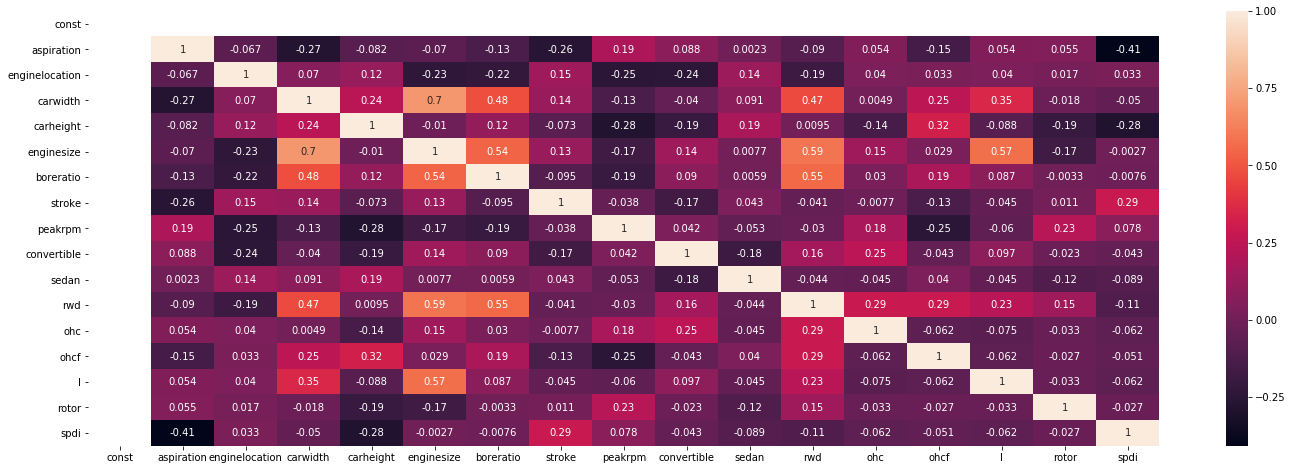

In [310]:
plt.figure(figsize=(24,8))
sns.heatmap(X_train_withoutcar_scaled_sm.corr(),annot=True)

In [311]:
# removing spdi because of high p value

In [312]:
X_train_withoutcar_scaled.drop('spdi',axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           7.45e-65
Time:                        22:12:22   Log-Likelihood:                -1300.7
No. Observations:                 143   AIC:                             2633.
Df Residuals:                     127   BIC:                             2681.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.559e+04   2378.417      6.556      0.000    1.09e+04    2.03e+04
aspiration     -1768.4288    574.139     -3.080      0.003   -2904.546    -632.312
enginelocation -1.115e+04   1821.778     -6.121      0.000   -1.48e+04   -7546.499
carwidth        1.196e+04   1767.423      6.764      0.000    8457.642    1.55e+04
carheight       3706.3844   1085.557      3.414      0.001    1558.262    5854.507
enginesize      3.597e+04   3178.277     11.316      0.000    2.97e+04    4.23e+04
boreratio      -6252.8767   1411.638     -4.430      0.000   -9046.253   -3459.501
stroke         -5584.5212   1495.836     -3.733      0.000   -8544.510   -2624.532
peakrpm         2552.9333   1305.739      1.955      0.053     -30.888    5136.754
convertible     4951.3640   1160.949      4.265      0.000    2654.055    7248.673
sedan            990.7610    400.938      2.471      0.015     197.377    1784.145
rwd             2557.9505    618.223      4.138      0.000    1334.599    3781.302
ohc            -2071.8587    918.833     -2.255      0.026   -3890.063    -253.655
ohcf           -3786.9365   1075.367     -3.522      0.001   -5914.894   -1658.979
l              -4355.7318   1124.921     -3.872      0.000   -6581.748   -2129.716
rotor           6818.9323   1908.711      3.573      0.001    3041.937    1.06e+04
==============================================================================
Omnibus:                        2.818   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.904
Skew:                           0.012   Prob(JB):                        0.234
Kurtosis:                       3.698   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,154.27
5,enginesize,7.11
3,carwidth,3.58
11,rwd,2.47
14,l,2.24
6,boreratio,2.04
2,enginelocation,1.86
8,peakrpm,1.61
12,ohc,1.50
13,ohcf,1.47


In [314]:
# removing peakrpm because of high p value

In [315]:
X_train_withoutcar_scaled.drop(['peakrpm'],axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     114.0
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           4.43e-65
Time:                        22:12:22   Log-Likelihood:                -1302.8
No. Observations:                 143   AIC:                             2636.
Df Residuals:                     128   BIC:                             2680.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.818e+04   1996.680      9.107      0.000    1.42e+04    2.21e+04
aspiration     -1539.2061    568.204     -2.709      0.008   -2663.496    -414.916
enginelocation -1.269e+04   1660.910     -7.641      0.000    -1.6e+04   -9404.290
carwidth         1.31e+04   1686.524      7.765      0.000    9759.347    1.64e+04
carheight       3251.1934   1071.925      3.033      0.003    1130.206    5372.181
enginesize      3.377e+04   3006.669     11.233      0.000    2.78e+04    3.97e+04
boreratio      -6560.9644   1418.198     -4.626      0.000   -9367.112   -3754.817
stroke         -5415.9825   1509.726     -3.587      0.000   -8403.233   -2428.732
convertible     4739.7837   1168.570      4.056      0.000    2427.568    7051.999
sedan           1025.2747    404.942      2.532      0.013     224.029    1826.521
rwd             2687.0928    621.425      4.324      0.000    1457.498    3916.688
ohc            -1596.5374    895.804     -1.782      0.077   -3369.039     175.964
ohcf           -4278.3588   1057.047     -4.047      0.000   -6369.907   -2186.811
l              -4015.4878   1123.567     -3.574      0.000   -6238.656   -1792.320
rotor           7059.6123   1925.625      3.666      0.000    3249.435    1.09e+04
==============================================================================
Omnibus:                        3.171   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                3.226
Skew:                           0.118   Prob(JB):                        0.199
Kurtosis:                       3.697   Cond. No.                         38.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [316]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,106.38
5,enginesize,6.23
3,carwidth,3.19
10,rwd,2.44
13,l,2.19
6,boreratio,2.01
2,enginelocation,1.51
11,ohc,1.39
12,ohcf,1.39
4,carheight,1.37


In [317]:
# removing ohc because of high p value 

In [318]:
X_train_withoutcar_scaled.drop(['ohc'],axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     120.5
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.87e-65
Time:                        22:12:23   Log-Likelihood:                -1304.6
No. Observations:                 143   AIC:                             2637.
Df Residuals:                     129   BIC:                             2679.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.853e+04   2003.812      9.249      0.000    1.46e+04    2.25e+04
aspiration     -1560.4619    572.851     -2.724      0.007   -2693.862    -427.061
enginelocation -1.345e+04   1619.091     -8.306      0.000   -1.67e+04   -1.02e+04
carwidth        1.346e+04   1688.428      7.970      0.000    1.01e+04    1.68e+04
carheight       3400.3702   1077.629      3.155      0.002    1268.254    5532.486
enginesize      3.269e+04   2969.403     11.009      0.000    2.68e+04    3.86e+04
boreratio      -6057.1223   1401.410     -4.322      0.000   -8829.847   -3284.398
stroke         -5190.0296   1517.031     -3.421      0.001   -8191.512   -2188.548
convertible     4306.9902   1152.662      3.737      0.000    2026.420    6587.561
sedan           1038.3170    408.277      2.543      0.012     230.532    1846.102
rwd             2350.9622    597.088      3.937      0.000    1169.610    3532.315
ohcf           -4075.7180   1059.742     -3.846      0.000   -6172.444   -1978.992
l              -3408.1927   1079.644     -3.157      0.002   -5544.295   -1272.090
rotor           7258.6726   1938.531      3.744      0.000    3423.241    1.11e+04
==============================================================================
Omnibus:                        2.643   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.611
Skew:                           0.040   Prob(JB):                        0.271
Kurtosis:                       3.657   Cond. No.                         37.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [319]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,105.36
5,enginesize,5.97
3,carwidth,3.15
10,rwd,2.21
12,l,1.99
6,boreratio,1.93
2,enginelocation,1.41
11,ohcf,1.37
4,carheight,1.36
13,rotor,1.36


In [320]:
# removing carwidth to compensate correlation with enginesize as removal of enginesize is decreasing by a huge amount

In [321]:
X_train_withoutcar_scaled.drop(['carwidth'],axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     84.56
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           2.61e-55
Time:                        22:12:24   Log-Likelihood:                -1333.2
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     130   BIC:                             2731.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.636e+04   2415.865      6.772      0.000    1.16e+04    2.11e+04
aspiration     -2816.5444    670.221     -4.202      0.000   -4142.496   -1490.593
enginelocation -9226.9282   1861.921     -4.956      0.000   -1.29e+04   -5543.340
carheight       5623.0813   1266.727      4.439      0.000    3117.014    8129.149
enginesize      4.699e+04   2879.785     16.316      0.000    4.13e+04    5.27e+04
boreratio      -5248.3844   1700.947     -3.086      0.002   -8613.504   -1883.264
stroke         -5736.2902   1844.241     -3.110      0.002   -9384.900   -2087.681
convertible     3787.2266   1400.467      2.704      0.008    1016.571    6557.882
sedan           1171.9613    496.426      2.361      0.020     189.841    2154.081
rwd             1946.9317    723.992      2.689      0.008     514.599    3379.264
ohcf           -2271.2465   1259.860     -1.803      0.074   -4763.729     221.236
l              -4283.7457   1307.036     -3.277      0.001   -6869.561   -1697.931
rotor           1.139e+04   2273.355      5.008      0.000    6887.864    1.59e+04
==============================================================================
Omnibus:                        4.840   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.089   Jarque-Bera (JB):                6.204
Skew:                           0.132   Prob(JB):                       0.0450
Kurtosis:                       3.986   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [322]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,103.41
4,enginesize,3.79
9,rwd,2.20
11,l,1.97
5,boreratio,1.92
6,stroke,1.35
10,ohcf,1.31
3,carheight,1.27
2,enginelocation,1.26
12,rotor,1.26


In [323]:
# removing ohcf because of high p value

In [324]:
X_train_withoutcar_scaled.drop(['ohcf'],axis=1,inplace=True)
X_train_withoutcar_scaled_sm=sm.add_constant(X_train_withoutcar_scaled)
model_withoutcar=sm.OLS(y_train_withoutcar,X_train_withoutcar_scaled_sm).fit()
model_withoutcar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     90.40
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.31e-55
Time:                        22:12:25   Log-Likelihood:                -1335.0
No. Observations:                 143   AIC:                             2694.
Df Residuals:                     131   BIC:                             2730.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.641e+04   2436.351      6.737      0.000    1.16e+04    2.12e+04
aspiration     -2659.8332    670.242     -3.968      0.000   -3985.732   -1333.934
enginelocation -9354.7453   1876.481     -4.985      0.000   -1.31e+04   -5642.618
carheight       4998.7706   1228.890      4.068      0.000    2567.734    7429.808
enginesize       4.76e+04   2884.054     16.505      0.000    4.19e+04    5.33e+04
boreratio      -5332.8229   1714.842     -3.110      0.002   -8725.189   -1940.457
stroke         -5391.3003   1849.971     -2.914      0.004   -9050.983   -1731.617
convertible     3860.9351   1411.840      2.735      0.007    1067.978    6653.892
sedan           1177.2473    500.663      2.351      0.020     186.817    2167.677
rwd             1550.2577    695.644      2.229      0.028     174.107    2926.408
l              -4250.3967   1318.081     -3.225      0.002   -6857.875   -1642.918
rotor           1.165e+04   2288.087      5.091      0.000    7121.537    1.62e+04
==============================================================================
Omnibus:                        5.977   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                9.185
Skew:                           0.092   Prob(JB):                       0.0101
Kurtosis:                       4.228   Cond. No.                         28.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [325]:
VIF(X_train_withoutcar_scaled_sm)

,Features,VIF
0,const,103.40
4,enginesize,3.74
9,rwd,2.00
10,l,1.97
5,boreratio,1.92
6,stroke,1.34
2,enginelocation,1.26
11,rotor,1.26
3,carheight,1.17
7,convertible,1.17


In [326]:
X_train_withoutcar_scaled_sm.columns

Index(['const', 'aspiration', 'enginelocation', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'convertible', 'sedan', 'rwd', 'l', 'rotor'],
      dtype='object')

In [327]:
Model_features_withoutcar=['aspiration', 'enginelocation', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'convertible', 'sedan', 'rwd', 'l', 'rotor']

## Residual Analysis

In [328]:
#predict the values using training data
y_train_withoutcar_predict=model_withoutcar.predict(X_train_withoutcar_scaled_sm)

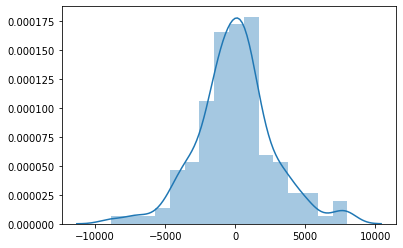

In [329]:
#residual plot to check whether error terms are normal distributed
sns.distplot(y_train_withoutcar-y_train_withoutcar_predict)

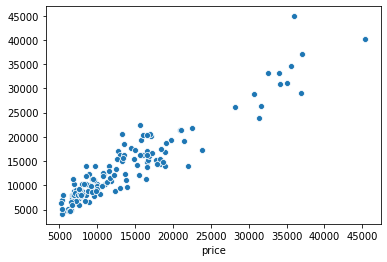

In [330]:
sns.scatterplot(y_train_withoutcar,y_train_withoutcar_predict)

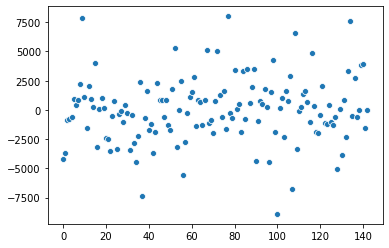

In [331]:
#to check the whether there is any correlation or patterns in error terms
sns.scatterplot(np.arange(0,143),y_train_withoutcar-y_train_withoutcar_predict)

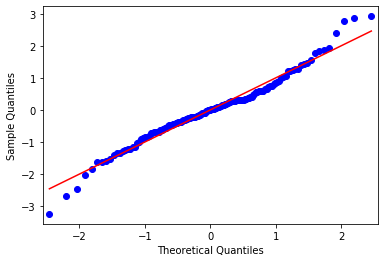

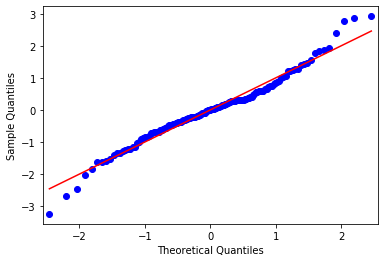

In [332]:
#Q-Q plot
sm.qqplot(model_withoutcar.resid,line='s',fit=True)

In [333]:
X_test_withoutcar_scaled_sm=X_test_withoutcar_scaled[Model_features_withoutcar]

In [334]:
X_test_withoutcar_scaled_sm.shape

(62, 11)

In [335]:
X_test_withoutcar_scaled_sm=sm.add_constant(X_test_withoutcar_scaled_sm,has_constant='add')

In [336]:
y_test_withoutcar_predict=model_withoutcar.predict(X_test_withoutcar_scaled_sm)

In [337]:
r2_score(y_test_withoutcar,y_test_withoutcar_predict)

0.8659453898300584

In [338]:
model_withoutcar.params

const             16413.054968
aspiration        -2659.833183
enginelocation    -9354.745306
carheight          4998.770554
enginesize        47600.384962
boreratio         -5332.822875
stroke            -5391.300269
convertible        3860.935062
sedan              1177.247276
rwd                1550.257672
l                 -4250.396667
rotor             11647.919755
dtype: float64

In [339]:
model.params

const           3788.064092
aspiration     -3153.054486
wheelbase       8918.303956
enginesize     28669.208004
boreratio      -3552.439278
peakrpm         5260.540943
convertible     5953.746840
spdi           -2131.911690
audi            3274.012159
bmw             8629.754200
buick           8768.703288
jaguar          4946.033664
mazda           3137.494599
porsche        14429.464563
saab            3377.570980
subaru          1757.511080
volvo           1852.318015
dtype: float64

## Derving variables using model with carname and without carname

#### Inferences

- Order of prices of car based on company names
    - porsche > buick > bmw > jaguar > saab > audi > mazda > volvo > subaru

- Enginesize 
    - As engine size increase price of the car is increasing

- Wheelbase
    - width of between the front and rear wheel increase price of the car increase
    - wheel base is proportional to carlength

- Convertible and sedan car body types are having high price in the market

- Aspiration(std)
    - it is having negative impact on price.
- Boreratio and stoke also has negative impact on price.
    - As they increase, the price decreases

- drivewheel rwd having good price in market

- spdi fuelsystmes are having negative impact price